In [1]:
#reading data
data <- read.csv("dcr.csv")

In [2]:
library('ggplot2')

In [579]:
library(reshape2)

In [15]:
library("dplyr")

In [4]:
library('e1071') 

In [5]:
library('caTools')

In [6]:
library('jtools')

In [7]:
library('lmtest')

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




In [8]:
library('sandwich')

In [9]:
library('betareg')

In [10]:
library('MASS')


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select




In [11]:
library('optiRum')

In [12]:
library('tree')

In [13]:
library('partykit')

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm



In [14]:
library('tidyr')

In [55]:
library('readxl')

In [124]:
library('fabletools')

Registered S3 method overwritten by 'tsibble':
  method          from
  format.interval inum


Attaching package: 'fabletools'


The following object is masked from 'package:e1071':

    interpolate




In [140]:
library('AER')

Loading required package: car

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


Loading required package: survival



In [430]:
library('randomForest')

In [454]:
library('gbm')

Loaded gbm 2.1.8



In [622]:
library('caret')

In [453]:
install.packages('gbm')

Installing package into 'C:/Users/pawel/OneDrive/Dokumenty/R/win-library/4.0'
(as 'lib' is unspecified)



package 'gbm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pawel\AppData\Local\Temp\RtmpQR11s0\downloaded_packages


## EDA

In [536]:
head(data)

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,...,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res,mat_diff
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
1,4,25,-2,25,119,NA,61031.10,33.91101,10.500,5.9,...,81.8,10.5,KY,97.99,0,0,0,NA,NA,121
2,4,26,-2,25,119,NA,60882.42,34.00723,10.500,5.9,...,81.8,10.5,KY,97.99,0,0,0,NA,NA,121
3,4,27,-2,25,119,NA,60729.80,34.33535,10.500,5.9,...,81.8,10.5,KY,97.99,0,0,0,NA,NA,121
4,4,28,-2,25,119,NA,60576.14,34.67254,10.875,5.9,...,81.8,10.5,KY,97.99,0,0,0,NA,NA,121
5,4,29,-2,25,119,NA,60424.39,34.95164,10.875,5.9,...,81.8,10.5,KY,97.99,0,0,0,NA,NA,121
6,4,30,-2,25,119,NA,60268.48,35.62184,10.875,5.9,...,81.8,10.5,KY,97.99,0,0,0,NA,NA,121


In [537]:
# no of observations in df
nrow(data)

[1] 62178

In [538]:
# variables names
colnames(data)

[1] "id"                      "time"                   
 [3] "orig_time"               "first_time"             
 [5] "mat_time"                "res_time"               
 [7] "balance_time"            "LTV_time"               
 [9] "interest_rate_time"      "rate_time"              
[11] "hpi_time"                "gdp_time"               
[13] "uer_time"                "REtype_CO_orig_time"    
[15] "REtype_PU_orig_time"     "REtype_SF_orig_time"    
[17] "investor_orig_time"      "balance_orig_time"      
[19] "FICO_orig_time"          "LTV_orig_time"          
[21] "Interest_Rate_orig_time" "state_orig_time"        
[23] "hpi_orig_time"           "default_time"           
[25] "payoff_time"             "status_time"            
[27] "lgd_time"                "recovery_res"           
[29] "mat_diff"

In [539]:
#unique values in column id(number of loans)
unique_id = nrow(unique(data[c("id")]))

In [540]:
# number of defaulted loans
defaults = nrow(subset(data, (data[, "status_time"] == 1)))

In [541]:
# % of defaulted loans
defaults/unique_id

[1] 0.305

In [542]:
# number of loan resolutions
colSums(!is.na(data['res_time']))

res_time 
    1160

In [543]:
# checking wheter loan resolution always appears with loan default
subset(data, (data[, "status_time"] == 1) & (!is.na(data[,"res_time"])))

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,...,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res,mat_diff
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
264,191,31,23,26,143,38,223884.74,87.17673,7.360,4.39,...,80.0,7.360,FL,221.91,1,0,1,0.8839190,25988.76,120
357,330,33,27,28,147,43,144374.85,98.27270,9.045,4.71,...,80.0,9.045,FL,222.39,1,0,1,1.2362130,-34103.22,120
361,331,31,26,28,147,60,285484.83,89.45262,10.620,4.64,...,80.0,10.620,FL,225.10,1,0,1,0.7068702,83684.11,121
373,343,42,27,32,148,44,79140.44,121.46337,8.870,4.71,...,90.0,8.870,MD,222.39,1,0,1,1.0773594,-6122.26,121
421,385,39,28,32,88,41,150074.42,122.61168,9.820,4.65,...,95.0,9.820,TX,219.67,1,0,1,0.3518053,97277.45,60
427,387,37,28,32,148,60,539016.07,124.54121,8.990,4.65,...,87.1,8.990,NY,219.67,1,0,1,0.7726883,122524.67,120
429,392,33,28,32,148,36,215294.72,97.03201,6.825,4.65,...,80.0,6.825,CA,219.67,1,0,1,0.8547624,31268.89,120
642,652,27,17,20,138,27,332004.84,55.81249,12.690,4.62,...,70.0,0.000,NY,179.45,1,0,1,0.0000000,332004.84,121
683,679,31,26,28,146,37,127240.41,95.15396,11.100,4.64,...,85.0,0.000,MA,225.10,1,0,1,0.5542172,56721.59,120


In [544]:
# descriptive statistics for lgd
summary(data$lgd_time)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.10    0.51    0.50    0.77    2.02   60653 

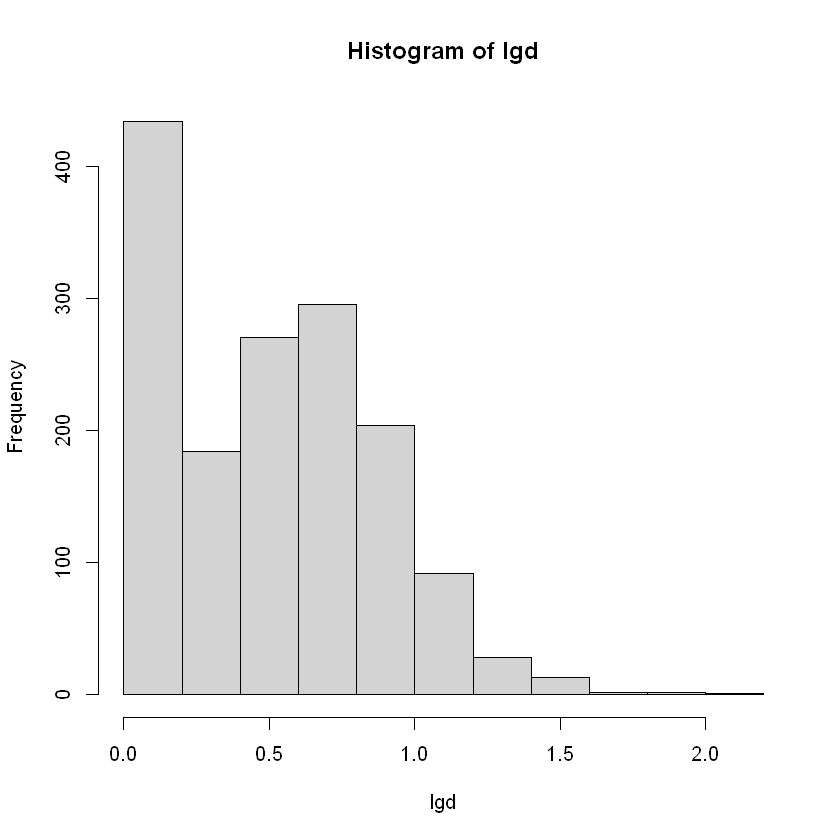

In [545]:
#histogram lgd
lgd <- data$lgd_time
hist(lgd)

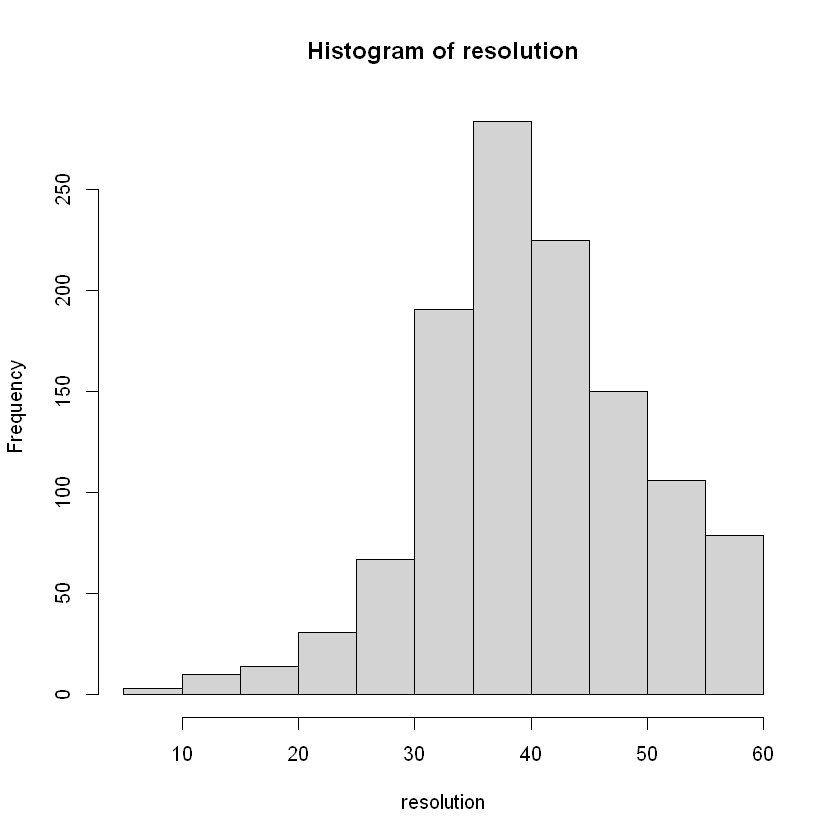

In [546]:
#histogram resolution 
resolution <- data$res_time
hist(resolution)

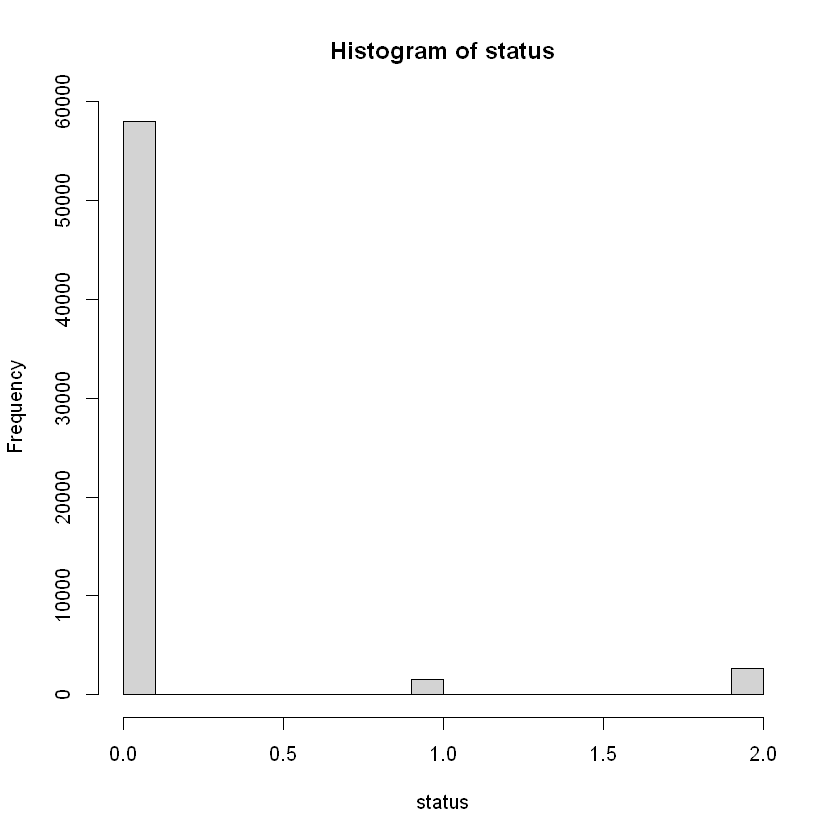

In [547]:
#histogram of loans(0 - not payoff, nor default, 1 - default, 2 - payoff)
status <- data$status_time
hist(status)

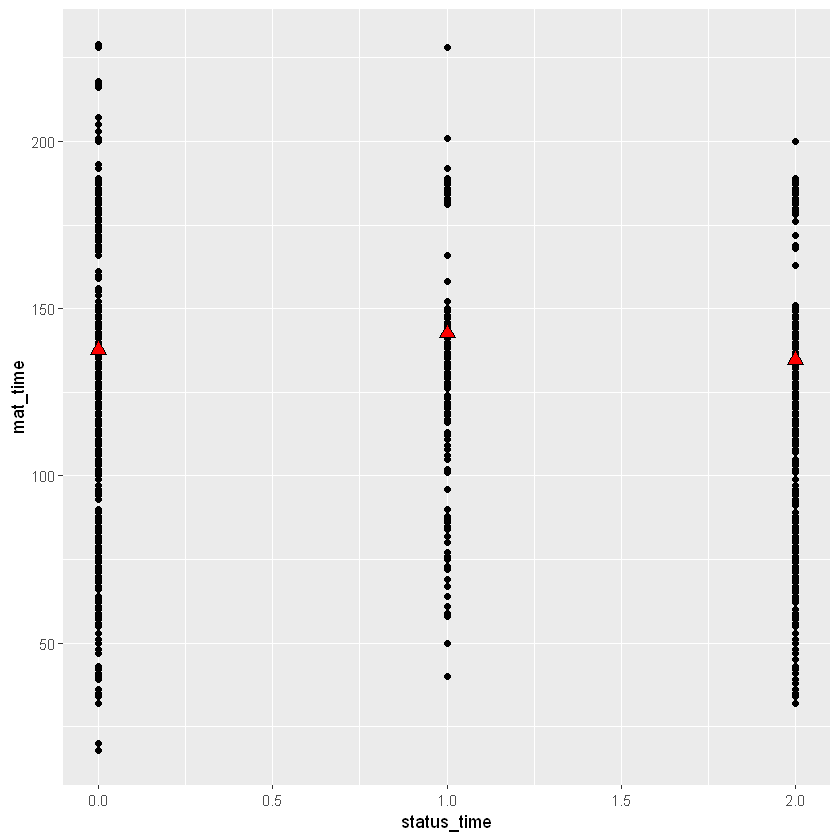

In [548]:
# maturity distribution for given loan status
ggplot(data=data, aes(x=status_time, y=mat_time, group=1)) +
  geom_point()+
    stat_summary(
        geom = "point",
        fun = "mean",
        col = "black",
        size = 3,
        shape = 24,
        fill = "red"
      )

In [549]:
# maturity distribution for given loan status
# ggplot() +
#     geom_boxplot(data=data[data['status_time'] == 0,],aes(y=mat_time,x=status_time),size=1)+
#     geom_boxplot(data=data[data['status_time'] == 1,],aes(y=mat_time,x=status_time),size=1)+
#     geom_boxplot(data=data[data['status_time'] == 2,],aes(y=mat_time,x=status_time),size=1)

In [550]:
# maturity calculation as maturity_time-origination time of loan
data$mat_diff <- data$mat_time-data$orig_time

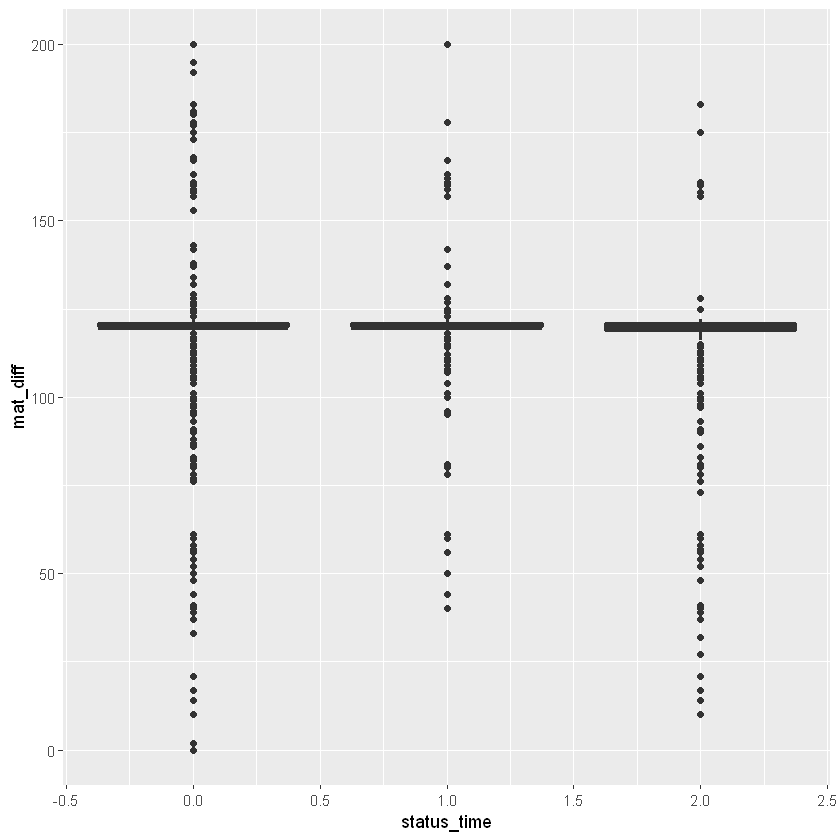

In [551]:
# maturity distribution for given loan status
ggplot() +
    geom_boxplot(data=data[data['status_time'] == 0,],aes(y=mat_diff,x=status_time),size=1)+
    geom_boxplot(data=data[data['status_time'] == 1,],aes(y=mat_diff,x=status_time),size=1)+
    geom_boxplot(data=data[data['status_time'] == 2,],aes(y=mat_diff,x=status_time),size=1)

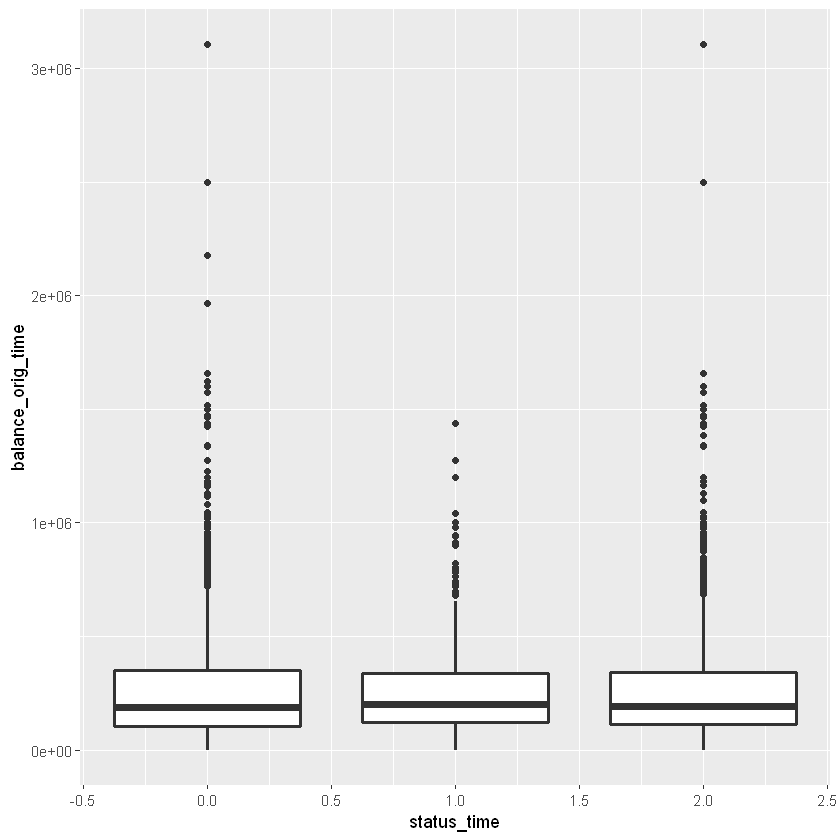

In [552]:
# distribution of outstanding balance at origination distribution by status of loan
ggplot() +
    geom_boxplot(data=data[data['status_time'] == 0,],aes(y=balance_orig_time,x=status_time),size=1)+
    geom_boxplot(data=data[data['status_time'] == 1,],aes(y=balance_orig_time,x=status_time),size=1)+
    geom_boxplot(data=data[data['status_time'] == 2,],aes(y=balance_orig_time,x=status_time),size=1)

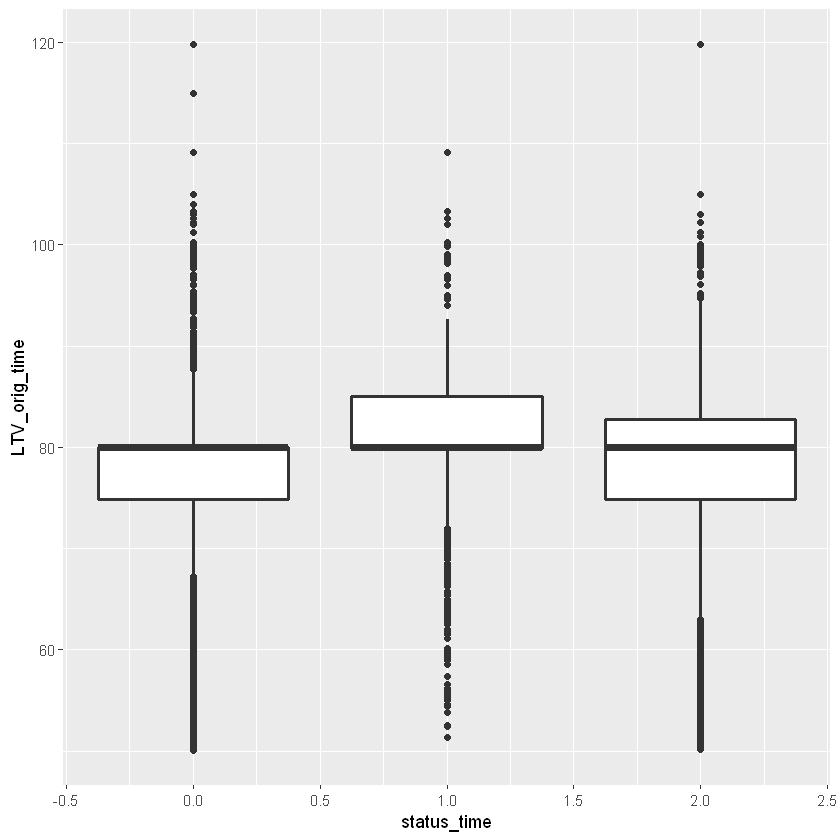

In [553]:
# distribution of LTV at origination by status of loan
ggplot() +
    geom_boxplot(data=data[data['status_time'] == 0,],aes(y=LTV_orig_time,x=status_time),size=1)+
    geom_boxplot(data=data[data['status_time'] == 1,],aes(y=LTV_orig_time,x=status_time),size=1)+
    geom_boxplot(data=data[data['status_time'] == 2,],aes(y=LTV_orig_time,x=status_time),size=1)

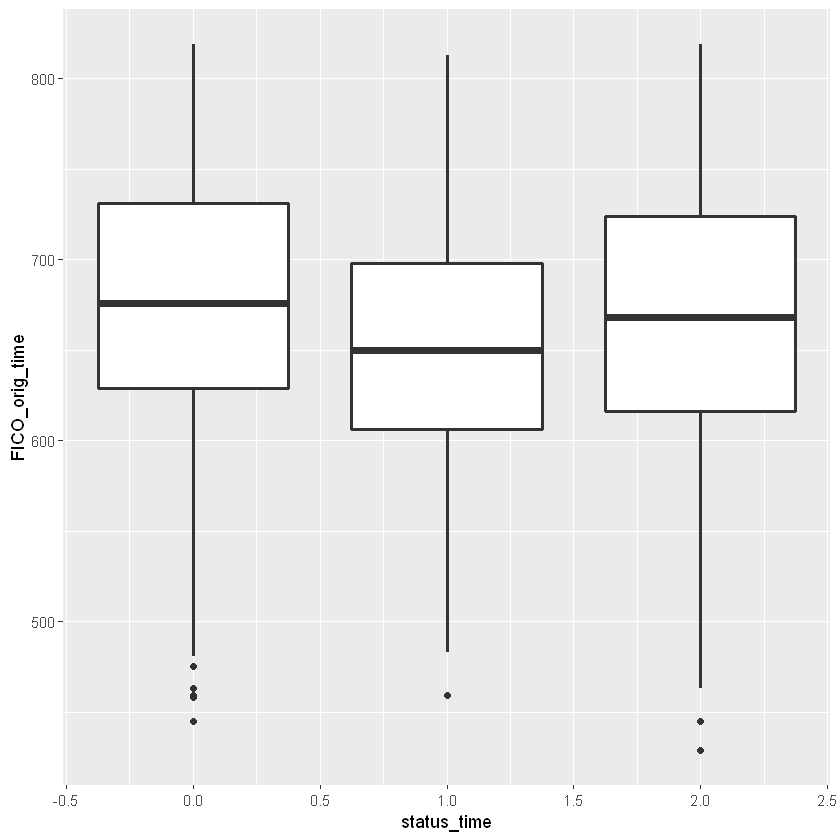

In [554]:
# distribution of FICO at origination by status of loan
ggplot() +
    geom_boxplot(data=data[data['status_time'] == 0,],aes(y=FICO_orig_time,x=status_time),size=1)+
    geom_boxplot(data=data[data['status_time'] == 1,],aes(y=FICO_orig_time,x=status_time),size=1)+
    geom_boxplot(data=data[data['status_time'] == 2,],aes(y=FICO_orig_time,x=status_time),size=1)

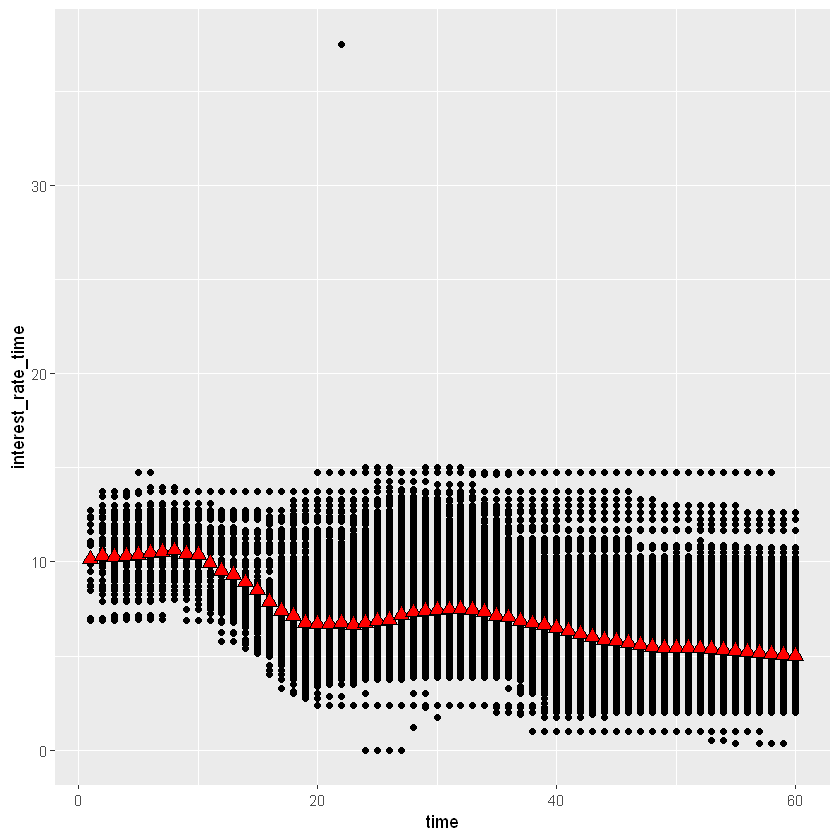

In [555]:
# Interest rate against observation times
ggplot(data=data, aes(x=time, y=interest_rate_time, group=1)) +
  geom_point()+
    stat_summary(
        geom = "point",
        fun = "mean",
        col = "black",
        size = 3,
        shape = 24,
        fill = "red"
      )

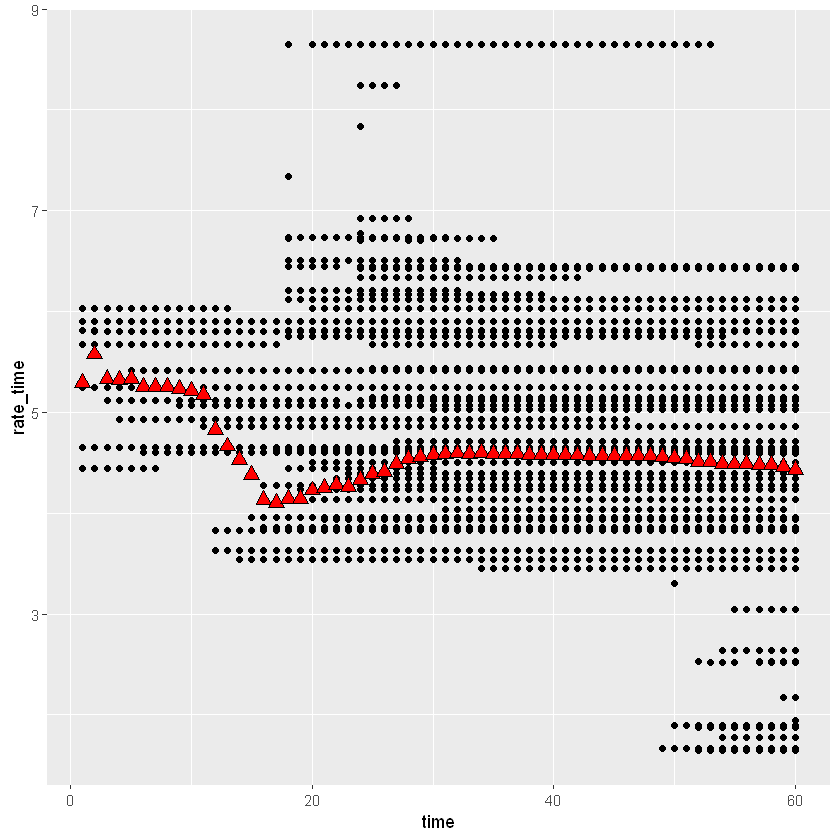

In [556]:
# Risk_free Rate against observation times
ggplot(data=data, aes(x=time, y=rate_time, group=1)) +
  geom_point()+
    stat_summary(
        geom = "point",
        fun = "mean",
        col = "black",
        size = 3,
        shape = 24,
        fill = "red"
      )

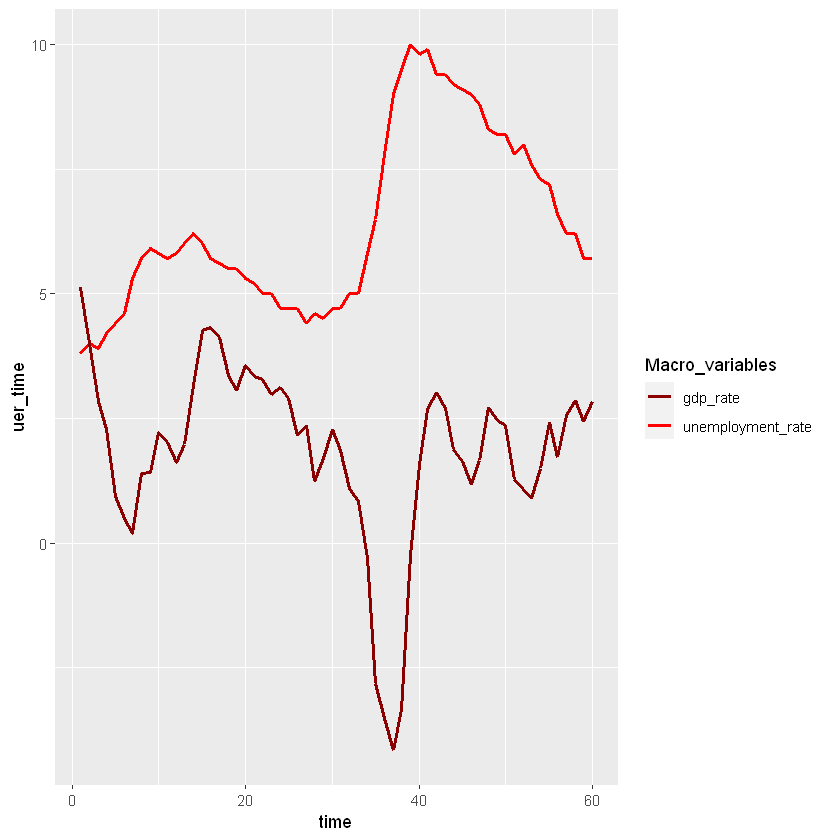

In [557]:
# macro variables against time 
ggplot()+
    geom_line(data=data,aes(y=uer_time,x= time,colour="unemployment_rate"),size=1 )+
    geom_line(data=data,aes(y=gdp_time,x= time,colour="gdp_rate"),size=1) +
    scale_color_manual(values = c(
    'unemployment_rate' = 'red',
    'gdp_rate' = 'darkred')) +
  labs(color = 'Macro_variables')

In [558]:
# data with only defaulted loans
data_post_d <- data[data$status_time == 1,]

In [559]:
data_post_d <- data_post_d %>%
  group_by(time) %>%
  summarise(count = n())

`summarise()` ungrouping output (override with `.groups` argument)



In [560]:
# data with only payoff loans
data_post_p <- data[data$status_time == 2,]

In [561]:
data_post_p <- data_post_p %>%
  group_by(time) %>%
  summarise(count = n())

`summarise()` ungrouping output (override with `.groups` argument)



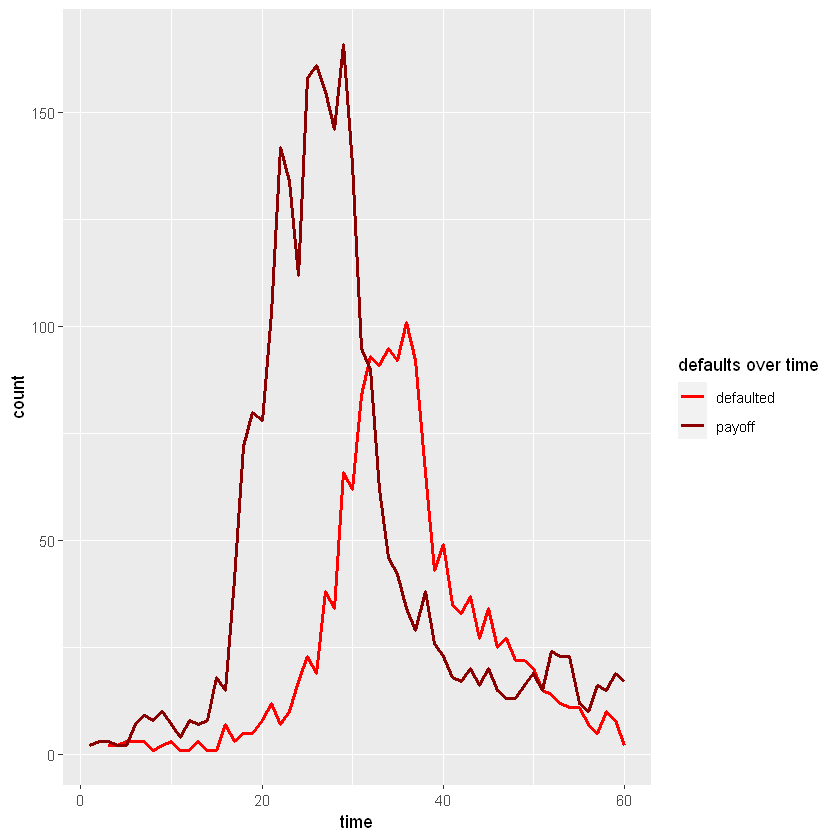

In [562]:
# payoff and defaulted loans over time 
ggplot()+
    geom_line(data=data_post_d,aes(y=count,x=time,colour="defaulted"),size=1)+
    geom_line(data=data_post_p,aes(y=count,x=time,colour="payoff"),size=1) +
    scale_color_manual(values = c(
    'defaulted' = 'red',
    'payoff' = 'darkred')) +
  labs(color = 'defaults over time')

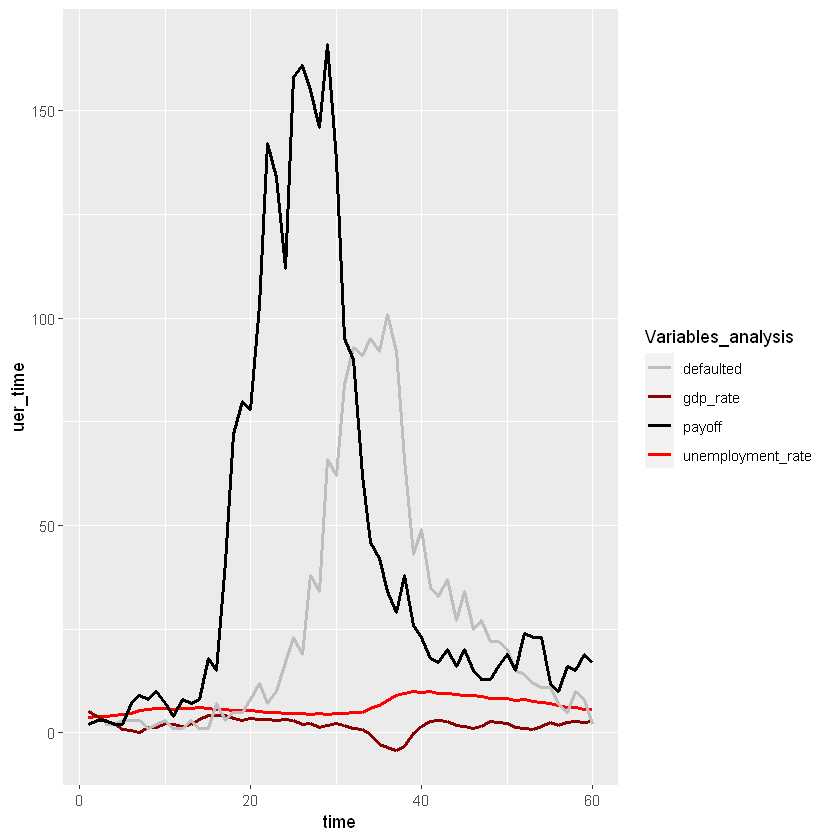

In [563]:
# payoff and defaulted loans over time & macro variables
ggplot()+
    geom_line(data=data,aes(y=uer_time,x= time,colour="unemployment_rate"),size=1 )+
    geom_line(data=data,aes(y=gdp_time,x= time,colour="gdp_rate"),size=1) +
    geom_line(data=data_post_d,aes(y=count,x=time,colour="defaulted"),size=1 )+
    geom_line(data=data_post_p,aes(y=count,x=time,colour="payoff"),size=1) +
    scale_color_manual(values = c(
    'unemployment_rate' = 'red',
    'gdp_rate' = 'darkred',
    'defaulted' = 'grey',
    'payoff' = 'black')) +
  labs(color = 'Variables_analysis')

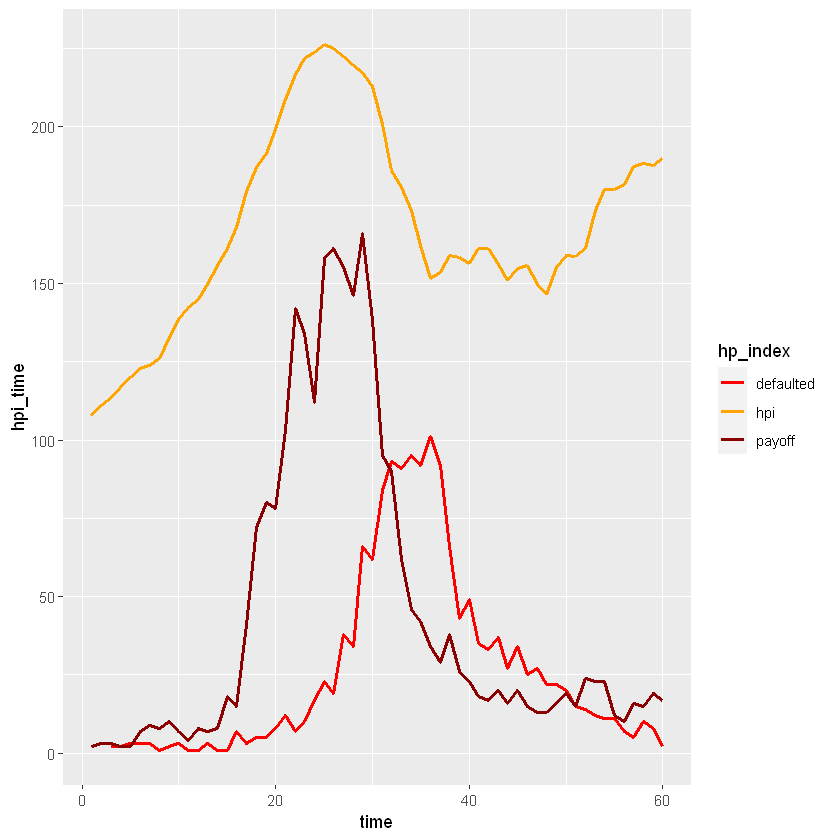

In [564]:
# HPI graph
ggplot()+
    geom_line(data=data,aes(y=hpi_time, x= time,colour="hpi"),size=1 )+
    geom_line(data=data_post_d,aes(y=count,x=time,colour="defaulted"),size=1 )+
    geom_line(data=data_post_p,aes(y=count,x=time,colour="payoff"),size=1) +
    scale_color_manual(values = c(
        'hpi' = 'orange',
        'defaulted' = 'red',
        'payoff' = 'darkred')) +
    labs(color = 'hp_index')

In [565]:
#house price index at observation time for defaulted loans
hpi_mean_d = data[data[, "status_time"] == 1,]['hpi_orig_time']

In [566]:
mean(hpi_mean_d$hpi_orig_time)

[1] 209.535

In [567]:
#house price index at observation time for payoff loans
hpi_mean_nd = data[data[, "status_time"] == 2,]['hpi_orig_time']

In [568]:
#house price index at observation time for non-defaulted loans
mean(hpi_mean_nd$hpi_orig_time)

[1] 186.8024

In [569]:
# investor borrower - % of defaulted loans
inv_b = data[data[, "investor_orig_time"] == 1,]

In [570]:
inv_b_unique_id = nrow(unique(inv_b['id']))

In [571]:
nrow(subset(inv_b, (!is.na(inv_b[,'lgd_time']))))/inv_b_unique_id

[1] 0.350081

In [573]:
# only defaulted loans
data_cut_d.m = melt(data[data[, "status_time"] == 1,][,14:17])

No id variables; using all as measure variables



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



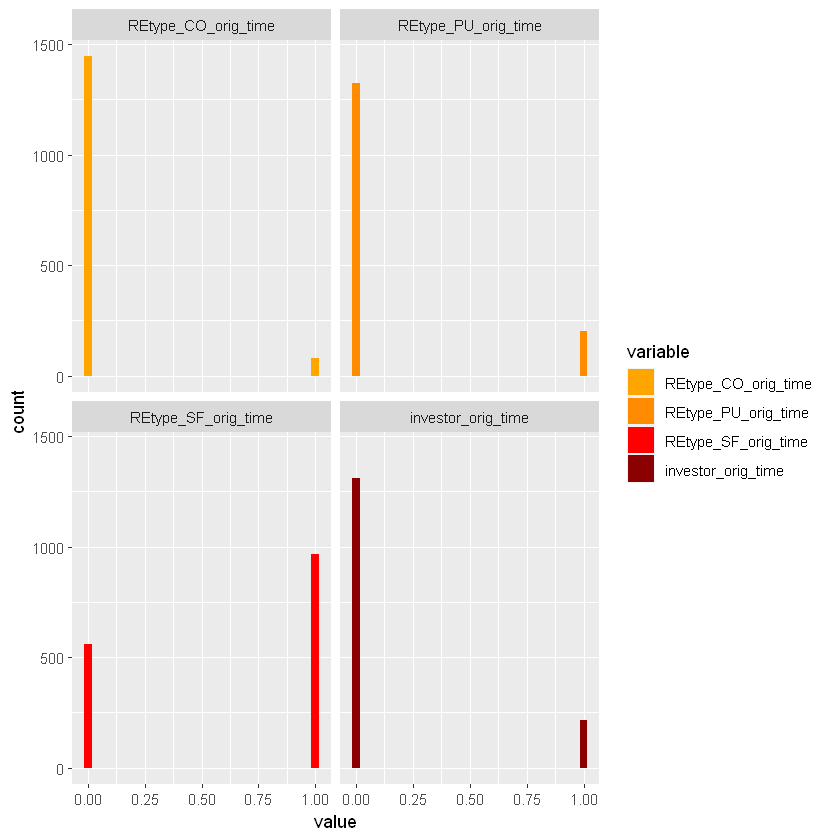

In [574]:
# histogram for real estate type dummy variables and investor dummy variable
# 1st - real estate type condominium (REtype_CO_orig_time)
# 2nd - real estate type planned urban dev (REtype_PU_orig_time)
# 3rd - real estate type single family home (REtype_SF_orig_time)
# 4th - investor borrower (investor_orig_time) 
ggplot(data_cut_d.m, aes(value), color=cyl) + geom_histogram(aes(fill=variable)) +
facet_wrap(~variable)+
scale_fill_manual(values=c("orange", "darkorange", "red", "darkred"))

In [575]:
# only payoff loans
data_cut_p.m = melt(data[data[, "status_time"] == 2,][,14:17])

No id variables; using all as measure variables



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



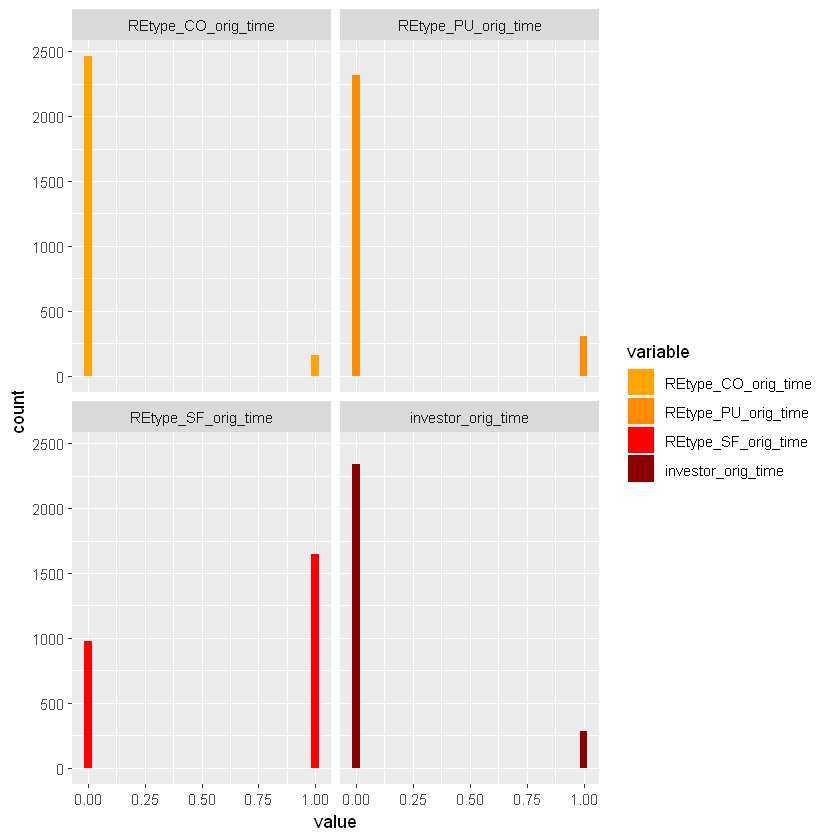

In [576]:
ggplot(data_cut_p.m, aes(value), color=cyl) + geom_histogram(aes(fill=variable)) +
facet_wrap(~variable)+
scale_fill_manual(values=c("orange", "darkorange", "red", "darkred"))

In [577]:
# not defaulted, nor payoff
data_cut_a.m = melt(data[data[, "status_time"] == 0,][,14:17])

No id variables; using all as measure variables



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



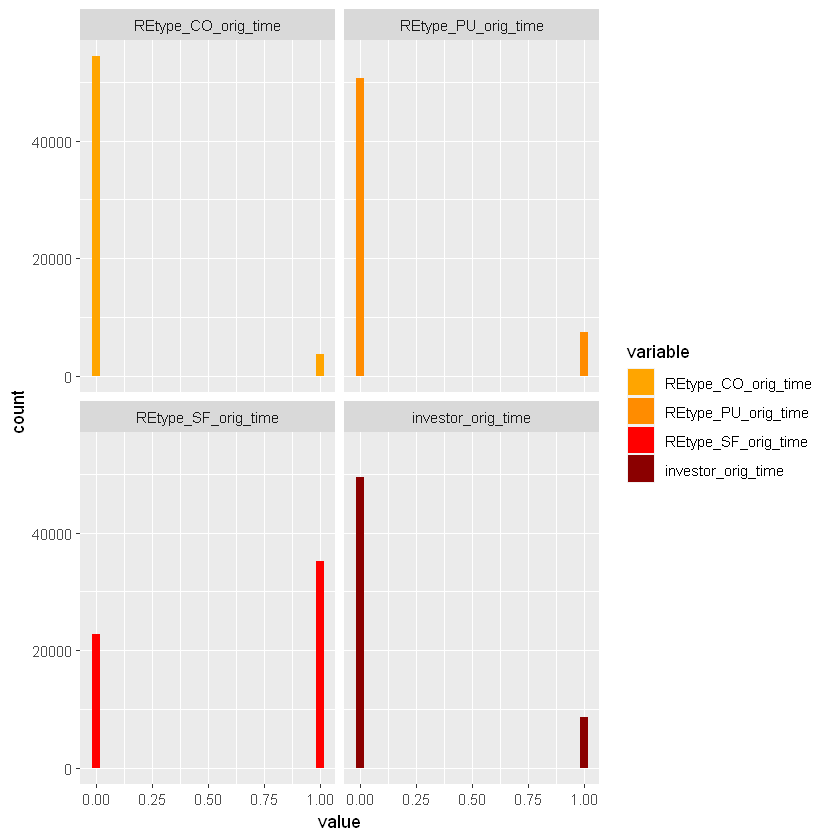

In [578]:
ggplot(data_cut_a.m, aes(value)) + geom_histogram(aes(fill=variable)) +
facet_wrap(~variable)+
scale_fill_manual(values=c("orange", "darkorange", "red", "darkred"))

In [ ]:
#It can be deduced from the histograms' analysis above that 4 categorical variables have marginal impact on default event, this hypothesis will be tested at the modelling stage

## Feature Selection

### PCA

In [17]:
colnames(data)

[1] "id"                      "time"                   
 [3] "orig_time"               "first_time"             
 [5] "mat_time"                "res_time"               
 [7] "balance_time"            "LTV_time"               
 [9] "interest_rate_time"      "rate_time"              
[11] "hpi_time"                "gdp_time"               
[13] "uer_time"                "REtype_CO_orig_time"    
[15] "REtype_PU_orig_time"     "REtype_SF_orig_time"    
[17] "investor_orig_time"      "balance_orig_time"      
[19] "FICO_orig_time"          "LTV_orig_time"          
[21] "Interest_Rate_orig_time" "state_orig_time"        
[23] "hpi_orig_time"           "default_time"           
[25] "payoff_time"             "status_time"            
[27] "lgd_time"                "recovery_res"           
[29] "mat_diff"

In [587]:
head(data)

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,...,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res,mat_diff
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
1,4,25,-2,25,119,NA,61031.10,33.91101,10.500,5.9,...,81.8,10.5,KY,97.99,0,0,0,NA,NA,121
2,4,26,-2,25,119,NA,60882.42,34.00723,10.500,5.9,...,81.8,10.5,KY,97.99,0,0,0,NA,NA,121
3,4,27,-2,25,119,NA,60729.80,34.33535,10.500,5.9,...,81.8,10.5,KY,97.99,0,0,0,NA,NA,121
4,4,28,-2,25,119,NA,60576.14,34.67254,10.875,5.9,...,81.8,10.5,KY,97.99,0,0,0,NA,NA,121
5,4,29,-2,25,119,NA,60424.39,34.95164,10.875,5.9,...,81.8,10.5,KY,97.99,0,0,0,NA,NA,121
6,4,30,-2,25,119,NA,60268.48,35.62184,10.875,5.9,...,81.8,10.5,KY,97.99,0,0,0,NA,NA,121


In [18]:
unique(data$res_time)

[1] NA 38 43 60 44 41 36 27 37 48 33 35 34 30 53 39 40 42 21 32 57 23 22 45 29
[26] 31 20 25 28 55 58 51 47 54 50 49 52 46 56 10 17 14 13  9 15 11 19 12 59 18
[51] 16 24  7 26

In [21]:
data_modified <- data %>% dplyr::select(2,3,4,5,7,8,9,10,11,12,13,18,19,20,21,23,29)

In [23]:
head(data_modified)

,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,rate_time,hpi_time,gdp_time,uer_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,mat_diff
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,25,-2,25,119,61031.10,33.91101,10.500,5.9,226.29,2.899137,4.7,63750,587,81.8,10.5,97.99,121
2,26,-2,25,119,60882.42,34.00723,10.500,5.9,225.10,2.151365,4.7,63750,587,81.8,10.5,97.99,121
3,27,-2,25,119,60729.80,34.33535,10.500,5.9,222.39,2.361722,4.4,63750,587,81.8,10.5,97.99,121
4,28,-2,25,119,60576.14,34.67254,10.875,5.9,219.67,1.229172,4.6,63750,587,81.8,10.5,97.99,121
5,29,-2,25,119,60424.39,34.95164,10.875,5.9,217.37,1.692969,4.5,63750,587,81.8,10.5,97.99,121
6,30,-2,25,119,60268.48,35.62184,10.875,5.9,212.73,2.274218,4.7,63750,587,81.8,10.5,97.99,121


In [604]:
# getting the values that are 
data_predictors2 <- dplyr::select(data, 2,3,4,5,7,8,9,10,11,12,13,18,19,20,21,23,29)

In [ ]:
data_predictors2

In [ ]:
res.pca <- prcomp(data_predictors2, scale = TRUE, center = TRUE)

In [ ]:
summary(res.pca)

In [ ]:
# The percentage of variances explained by each principal component.
fviz_eig(res.pca)

In [ ]:
# Results for Variables
res.var <- get_pca_var(res.pca)

In [ ]:
# Contributions of given variables to the PCs
res.var$contrib 

In [ ]:
# Graph of variables. Positive correlated variables point to the same side of the plot
# Negative correlated variables point to opposite sides of the graph.
fviz_pca_var(res.pca,
             col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )

In [ ]:
res.ind <- get_pca_ind(res.pca)

In [ ]:
# getting the 10 components that in overall explain 93% of varaiance
new_variables_cont <- res.ind$coord[,1:10]

In [ ]:
data_modified <- cbind(data_modified, new_variables_cont)

In [ ]:
data_modified <- subset(data_modified,select=-c(3,4,5,7,8,9,10,11,12,13,18,19,20,21,23,29))

### Probability of Cure

In [1241]:
# filtering loans that defaulted
data_modelling <- subset(data, (data[,"status_time"] == 1))

In [1242]:
# A loan that deafaulted and was not cured (resolution)
data_modelling$res_sold <- 1

In [1243]:
# A loan that deafaulted and was cured (no resolution)
data_modelling$res_sold[is.na(data_modelling[,"res_time"])] <- 0

In [1244]:
# selecting predictors and dependent variable(res_sold)
data_modelling <- dplyr::select(data_modelling, 2:8,14:16,18:20,22,28:30)

In [1245]:
# deleting resolution timestamp and resolution amount
data_modelling <- data_modelling[,-c(5,15)]

In [1246]:
str(data_modelling)

'data.frame':	1525 obs. of  15 variables:
 $ time               : int  37 37 40 31 31 33 31 32 42 41 ...
 $ orig_time          : int  18 25 21 21 23 27 26 27 27 28 ...
 $ first_time         : int  25 33 25 25 26 28 28 32 32 32 ...
 $ mat_time           : int  138 141 141 142 143 147 147 148 148 228 ...
 $ balance_time       : num  130140 127859 84387 227000 223885 ...
 $ LTV_time           : num  99.1 101.4 102.6 67.5 87.2 ...
 $ REtype_CO_orig_time: int  0 0 0 0 0 1 0 0 0 0 ...
 $ REtype_PU_orig_time: int  0 0 0 0 0 0 0 0 0 0 ...
 $ REtype_SF_orig_time: int  1 1 1 1 1 0 1 1 1 1 ...
 $ balance_orig_time  : num  128000 129500 88000 227000 227200 ...
 $ FICO_orig_time     : int  501 536 556 622 630 613 605 596 633 587 ...
 $ LTV_orig_time      : num  80 69.6 80 64.9 80 80 80 71.1 90 80 ...
 $ state_orig_time    : chr  "GA" "FL" "OH" "NY" ...
 $ mat_diff           : int  120 116 120 121 120 120 121 121 121 200 ...
 $ res_sold           : num  0 0 0 0 1 1 1 0 1 0 ...


In [1247]:
# changing variables types
data_modelling[colnames(data_modelling[,c(7:9)])] <- lapply(data_modelling[colnames(data_modelling[,c(7:9)])], factor)

In [1248]:
data_modelling$state_orig_time <- as.factor(data_modelling$state_orig_time)

In [1256]:
data_modelling[is.na(data_modelling['LTV_time']),]

,time,orig_time,first_time,mat_time,balance_time,LTV_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,state_orig_time,mat_diff,res_sold
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<int>,<dbl>
51256,28,1,25,61,21342.14,NA,0,0,1,0,486,70,MS,60,0


In [1197]:
# dropping missing observations(1)
data_modelling <- data_modelling %>% drop_na()

In [1198]:
str(data_modelling)

'data.frame':	1524 obs. of  15 variables:
 $ time               : int  37 37 40 31 31 33 31 32 42 41 ...
 $ orig_time          : int  18 25 21 21 23 27 26 27 27 28 ...
 $ first_time         : int  25 33 25 25 26 28 28 32 32 32 ...
 $ mat_time           : int  138 141 141 142 143 147 147 148 148 228 ...
 $ balance_time       : num  130140 127859 84387 227000 223885 ...
 $ LTV_time           : num  99.1 101.4 102.6 67.5 87.2 ...
 $ REtype_CO_orig_time: Factor w/ 2 levels "0","1": 1 1 1 1 1 2 1 1 1 1 ...
 $ REtype_PU_orig_time: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ REtype_SF_orig_time: Factor w/ 2 levels "0","1": 2 2 2 2 2 1 2 2 2 2 ...
 $ balance_orig_time  : num  128000 129500 88000 227000 227200 ...
 $ FICO_orig_time     : int  501 536 556 622 630 613 605 596 633 587 ...
 $ LTV_orig_time      : num  80 69.6 80 64.9 80 80 80 71.1 90 80 ...
 $ state_orig_time    : Factor w/ 51 levels "","AK","AL","AR",..: 12 11 36 35 11 11 11 6 22 6 ...
 $ mat_diff           : int  120 1

In [1199]:
set.seed(101) 

In [1200]:
train_index <- caret::createDataPartition(data_modelling$res_sold, p = .7, list = FALSE)

In [1201]:
train <- data_modelling[ train_index,]
test <- data_modelling[-train_index,]

In [1202]:
logit_full<- glm(res_sold~., family = binomial(link = 'logit'), data = train)

In [1203]:
logit_stepwise<- stepAIC(logit_full, k= qchisq(0.05, 1, lower.tail=F), direction = 'both')

Start:  AIC=1085.08
res_sold ~ time + orig_time + first_time + mat_time + balance_time + 
    LTV_time + REtype_CO_orig_time + REtype_PU_orig_time + REtype_SF_orig_time + 
    balance_orig_time + FICO_orig_time + LTV_orig_time + state_orig_time + 
    mat_diff


Step:  AIC=1085.08
res_sold ~ time + orig_time + first_time + mat_time + balance_time + 
    LTV_time + REtype_CO_orig_time + REtype_PU_orig_time + REtype_SF_orig_time + 
    balance_orig_time + FICO_orig_time + LTV_orig_time + state_orig_time

                      Df Deviance    AIC
- state_orig_time     49   962.51 1012.5
- mat_time             1   846.97 1081.3
- LTV_time             1   847.51 1081.8
- balance_time         1   847.56 1081.9
- REtype_PU_orig_time  1   847.89 1082.2
- balance_orig_time    1   847.92 1082.2
- orig_time            1   848.18 1082.5
- first_time           1   848.52 1082.8
- LTV_orig_time        1   848.73 1083.1
- REtype_SF_orig_time  1   849.66 1084.0
- REtype_CO_orig_time  1   849.96 1084.3


In [847]:
summary(logit_stepwise)


Call:
glm(formula = res_sold ~ time + REtype_CO_orig_time + balance_orig_time + 
    FICO_orig_time, family = binomial(link = "logit"), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7412   0.1235   0.4914   0.6842   2.1279  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           1.276e+00  8.199e-01   1.556 0.119608    
time                 -1.319e-01  1.085e-02 -12.153  < 2e-16 ***
REtype_CO_orig_time1  1.016e+00  4.715e-01   2.154 0.031247 *  
balance_orig_time    -1.557e-06  4.639e-07  -3.356 0.000791 ***
FICO_orig_time        7.991e-03  1.343e-03   5.950 2.68e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1182.69  on 1066  degrees of freedom
Residual deviance:  971.61  on 1062  degrees of freedom
AIC: 981.61

Number of Fisher Scoring iterations: 5


In [848]:
test$predict_logit <- predict(logit_stepwise, newdata = test, type = 'response')

In [849]:
gini_test<- optiRum::giniCoef(test$predict_logit, test$res_sold)

In [850]:
# The 0.51 Gini index for test sample highlights an average model discriminatory power.
gini_test

[1] 0.5123918

### Loss Severity

In [927]:
# filtering loans that defaulted
data_modelling <- subset(data, (data[,"status_time"] == 1))

In [928]:
# A loan that deafaulted and was not cured (resolution)
data_modelling$res_sold <- 1

In [929]:
# A loan that deafaulted and was cured (no resolution)
data_modelling$res_sold[is.na(data_modelling[,"res_time"])] <- 0

In [930]:
# filtering loans that was not cured
data_modelling <- data_modelling[data_modelling['res_sold']==1,]

In [931]:
# selecting predictors and dependent variable(lgd)
data_modelling <- dplyr::select(data_modelling, 2:8,14:16,18:20,22,27:30)

In [932]:
# time elapsed between bankruptcy and resolution
data_modelling$res_diff <- data_modelling$res_time - data_modelling$time

In [933]:
# deleting resolution amount
data_modelling <- data_modelling[,-c(16)]

In [935]:
# deleting region variable as categorical predictors must have at most 32 levels
data_modelling <- data_modelling[,-c(14)]

In [960]:
str(data_modelling)

'data.frame':	1160 obs. of  16 variables:
 $ time               : int  31 33 31 42 39 37 33 27 31 30 ...
 $ orig_time          : int  23 27 26 27 28 28 28 17 26 19 ...
 $ first_time         : int  26 28 28 32 32 32 32 20 28 19 ...
 $ res_time           : int  38 43 60 44 41 60 36 27 37 48 ...
 $ balance_time       : num  223885 144375 285485 79140 150074 ...
 $ LTV_time           : num  87.2 98.3 89.5 121.5 122.6 ...
 $ REtype_CO_orig_time: Factor w/ 2 levels "0","1": 1 2 1 1 1 1 1 1 1 1 ...
 $ REtype_PU_orig_time: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ REtype_SF_orig_time: Factor w/ 2 levels "0","1": 2 1 2 2 1 2 2 2 1 2 ...
 $ balance_orig_time  : num  227200 144790 286400 81000 161500 ...
 $ FICO_orig_time     : int  630 613 605 633 584 646 670 509 553 540 ...
 $ LTV_orig_time      : num  80 80 80 90 95 87.1 80 70 85 80 ...
 $ lgd_time           : num  0.884 1.236 0.707 1.077 0.352 ...
 $ mat_diff           : int  120 120 121 121 60 120 120 121 120 114 ...
 $ res_sold

In [937]:
# changing variables types
data_modelling[colnames(data_modelling[,c(8:10)])] <- lapply(data_modelling[colnames(data_modelling[,c(8:10)])], factor)

In [939]:
# dropping missing observations(1)
data_modelling <- data_modelling %>% drop_na()

In [961]:
str(data_modelling)

'data.frame':	1160 obs. of  16 variables:
 $ time               : int  31 33 31 42 39 37 33 27 31 30 ...
 $ orig_time          : int  23 27 26 27 28 28 28 17 26 19 ...
 $ first_time         : int  26 28 28 32 32 32 32 20 28 19 ...
 $ res_time           : int  38 43 60 44 41 60 36 27 37 48 ...
 $ balance_time       : num  223885 144375 285485 79140 150074 ...
 $ LTV_time           : num  87.2 98.3 89.5 121.5 122.6 ...
 $ REtype_CO_orig_time: Factor w/ 2 levels "0","1": 1 2 1 1 1 1 1 1 1 1 ...
 $ REtype_PU_orig_time: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ REtype_SF_orig_time: Factor w/ 2 levels "0","1": 2 1 2 2 1 2 2 2 1 2 ...
 $ balance_orig_time  : num  227200 144790 286400 81000 161500 ...
 $ FICO_orig_time     : int  630 613 605 633 584 646 670 509 553 540 ...
 $ LTV_orig_time      : num  80 80 80 90 95 87.1 80 70 85 80 ...
 $ lgd_time           : num  0.884 1.236 0.707 1.077 0.352 ...
 $ mat_diff           : int  120 120 121 121 60 120 120 121 120 114 ...
 $ res_sold

In [978]:
set.seed(101) 

In [921]:
# sample = sample.split(data_modelling$lgd_time, SplitRatio = 0.75)

In [922]:
# train = subset(data_modelling, sample == TRUE)
# test  = subset(data_modelling, sample == FALSE)

In [963]:
train_index <- caret::createDataPartition(data_modelling$lgd_time, p = .7, list = FALSE)

In [964]:
train <- data_modelling[ train_index,]
test <- data_modelling[-train_index,]

In [965]:
lgd_reg_tree_sev <- tree(lgd_time~., data=train)

In [966]:
summary(lgd_reg_tree_sev)


Regression tree:
tree(formula = lgd_time ~ ., data = train)
Variables actually used in tree construction:
[1] "res_time"          "balance_time"      "orig_time"        
[4] "res_diff"          "time"              "balance_orig_time"
Number of terminal nodes:  11 
Residual mean deviance:  0.07714 = 61.79 / 801 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.09200 -0.18470  0.01314  0.00000  0.17590  1.08300 

In [967]:
# prediction on test sample
lgd_reg_tree_predict_sev <- predict(lgd_reg_tree_sev, newdata = test)

In [968]:
# MSE calculation
mse_lgd_reg_sev <- mean((lgd_reg_tree_predict_sev - test$lgd_time)^2)

In [969]:
mse_lgd_reg_sev

[1] 0.09518559

In [970]:
# tree pruning
lgd_reg_tree_prune_sev <- prune.tree(lgd_reg_tree_sev, best=3)

In [971]:
summary(lgd_reg_tree_prune_sev)


Regression tree:
snip.tree(tree = lgd_reg_tree_sev, nodes = c(6L, 7L, 2L))
Variables actually used in tree construction:
[1] "res_time" "res_diff"
Number of terminal nodes:  3 
Residual mean deviance:  0.09583 = 77.53 / 809 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.819000 -0.218600  0.003788  0.000000  0.195900  1.167000 

In [972]:
#predicting pruned tree
lgd_reg_tree_predict_prune_sev <- predict(lgd_reg_tree_prune_sev, test)

In [977]:
# MSE calculation
mse_lgd_reg_sev <- mean((lgd_reg_tree_predict_prune_sev - test$lgd_time)^2)

In [975]:
mse_lgd_reg_sev

[1] 0.09862669

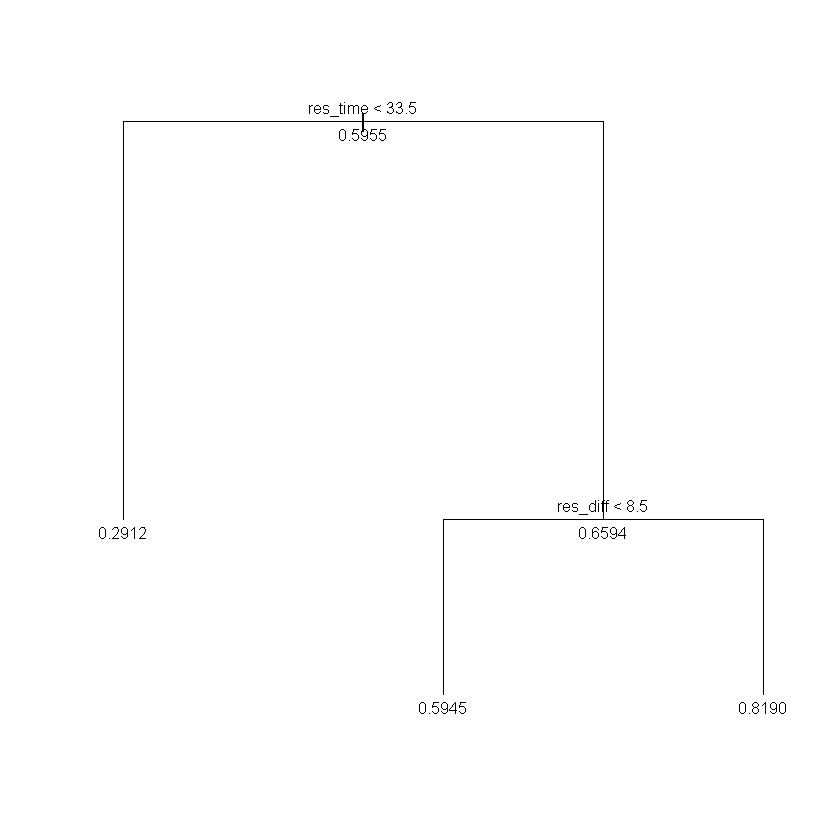

In [974]:
plot(lgd_reg_tree_prune_sev, 
   main="Classification Tree for Kyphosis")
   text(lgd_reg_tree_prune_sev, all=TRUE, cex=.8)

In [976]:
# In non-pruned tree appx.Residual mean deviance was 0.077, while in pruned tree 0.095
# The mean squared error of the predicted model on the test sample is less than 10% for both non-pruned and pruned trees.

### Conditional Evaluation of Loss Severity given time since default

In [1219]:
# filtering loans that defaulted
data_modelling <- subset(data, (data[,"status_time"] == 1))

In [1220]:
# A loan that deafaulted and was not cured (resolution)
data_modelling$res_sold <- 1

In [1221]:
# A loan that deafaulted and was cured (no resolution)
data_modelling$res_sold[is.na(data_modelling[,"res_time"])] <- 0

In [1222]:
# filtering loans that was not cured
data_modelling <- data_modelling[data_modelling['res_sold']==1,]

In [1223]:
# selecting predictors and dependent variable(lgd)
data_modelling <- dplyr::select(data_modelling, 2:8,14:16,18:20,22,27:30)

In [1224]:
# time elapsed between bankruptcy and resolution
data_modelling$res_diff <- data_modelling$res_time - data_modelling$time

In [1225]:
data_modelling$res_diff <- cut(data_modelling$res_diff, breaks=c(-1,12,38))

In [1226]:
# deleting resolution amount
data_modelling <- data_modelling[,-c(16)]

In [1227]:
# deleting region variable as categorical predictors must have at most 32 levels
data_modelling <- data_modelling[,-c(14)]

In [1228]:
str(data_modelling)

'data.frame':	1160 obs. of  17 variables:
 $ time               : int  31 33 31 42 39 37 33 27 31 30 ...
 $ orig_time          : int  23 27 26 27 28 28 28 17 26 19 ...
 $ first_time         : int  26 28 28 32 32 32 32 20 28 19 ...
 $ mat_time           : int  143 147 147 148 88 148 148 138 146 133 ...
 $ res_time           : int  38 43 60 44 41 60 36 27 37 48 ...
 $ balance_time       : num  223885 144375 285485 79140 150074 ...
 $ LTV_time           : num  87.2 98.3 89.5 121.5 122.6 ...
 $ REtype_CO_orig_time: int  0 1 0 0 0 0 0 0 0 0 ...
 $ REtype_PU_orig_time: int  0 0 0 0 0 0 0 0 0 0 ...
 $ REtype_SF_orig_time: int  1 0 1 1 0 1 1 1 0 1 ...
 $ balance_orig_time  : num  227200 144790 286400 81000 161500 ...
 $ FICO_orig_time     : int  630 613 605 633 584 646 670 509 553 540 ...
 $ LTV_orig_time      : num  80 80 80 90 95 87.1 80 70 85 80 ...
 $ lgd_time           : num  0.884 1.236 0.707 1.077 0.352 ...
 $ mat_diff           : int  120 120 121 121 60 120 120 121 120 114 ...
 $ res_s

In [1229]:
# changing variables types
data_modelling[colnames(data_modelling[,c(8:10)])] <- lapply(data_modelling[colnames(data_modelling[,c(8:10)])], factor)

In [1080]:
# data_modelling$state_orig_time <- as.factor(data_modelling$state_orig_time);

In [1082]:
# dropping missing observations(1)
data_modelling <- data_modelling %>% drop_na()

In [1100]:
str(data_modelling)

'data.frame':	1160 obs. of  17 variables:
 $ time               : int  31 33 31 42 39 37 33 27 31 30 ...
 $ orig_time          : int  23 27 26 27 28 28 28 17 26 19 ...
 $ first_time         : int  26 28 28 32 32 32 32 20 28 19 ...
 $ mat_time           : int  143 147 147 148 88 148 148 138 146 133 ...
 $ res_time           : int  38 43 60 44 41 60 36 27 37 48 ...
 $ balance_time       : num  223885 144375 285485 79140 150074 ...
 $ LTV_time           : num  87.2 98.3 89.5 121.5 122.6 ...
 $ REtype_CO_orig_time: Factor w/ 2 levels "0","1": 1 2 1 1 1 1 1 1 1 1 ...
 $ REtype_PU_orig_time: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ REtype_SF_orig_time: Factor w/ 2 levels "0","1": 2 1 2 2 1 2 2 2 1 2 ...
 $ balance_orig_time  : num  227200 144790 286400 81000 161500 ...
 $ FICO_orig_time     : int  630 613 605 633 584 646 670 509 553 540 ...
 $ LTV_orig_time      : num  80 80 80 90 95 87.1 80 70 85 80 ...
 $ lgd_time           : num  0.884 1.236 0.707 1.077 0.352 ...
 $ mat_diff

In [1084]:
set.seed(101) 

In [921]:
# sample = sample.split(data_modelling$lgd_time, SplitRatio = 0.75)

In [922]:
# train = subset(data_modelling, sample == TRUE)
# test  = subset(data_modelling, sample == FALSE)

In [1085]:
train_index <- caret::createDataPartition(data_modelling$lgd_time, p = .7, list = FALSE)

In [1086]:
train <- data_modelling[ train_index,]
test <- data_modelling[-train_index,]

In [1101]:
lgd_da_1 <- ctree(lgd_time~res_diff-res_sold,data=train,maxdepth = 1)

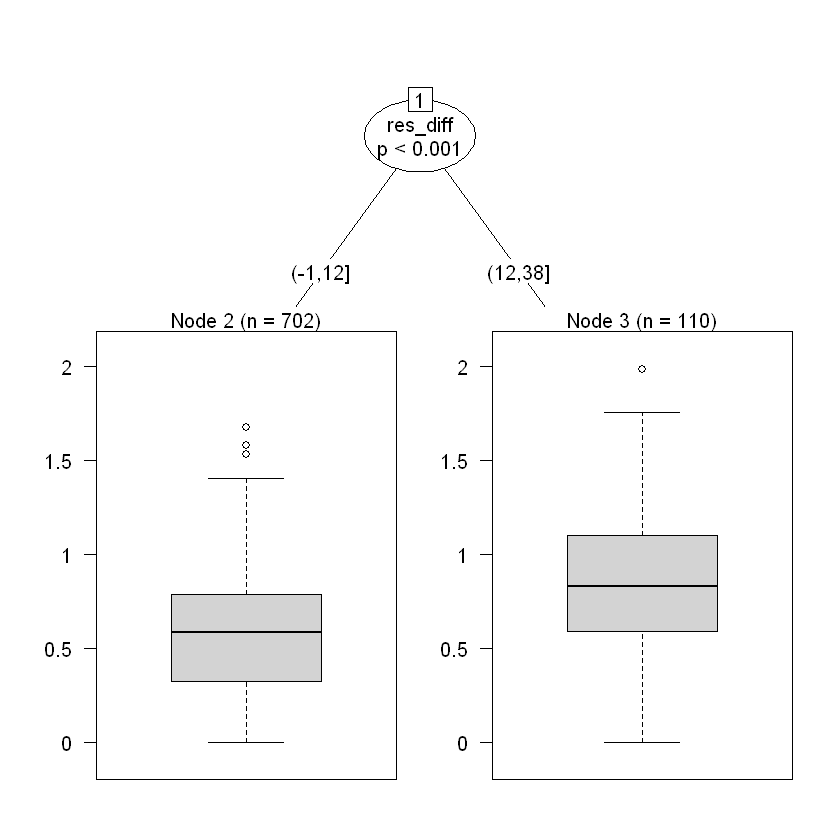

In [1102]:
plot(lgd_da_1)

In [1103]:
lgd_da_2 <- ctree(lgd_time ~res_diff + ., data=train, subset = predict(lgd_da_1, type = 'node') == 2)

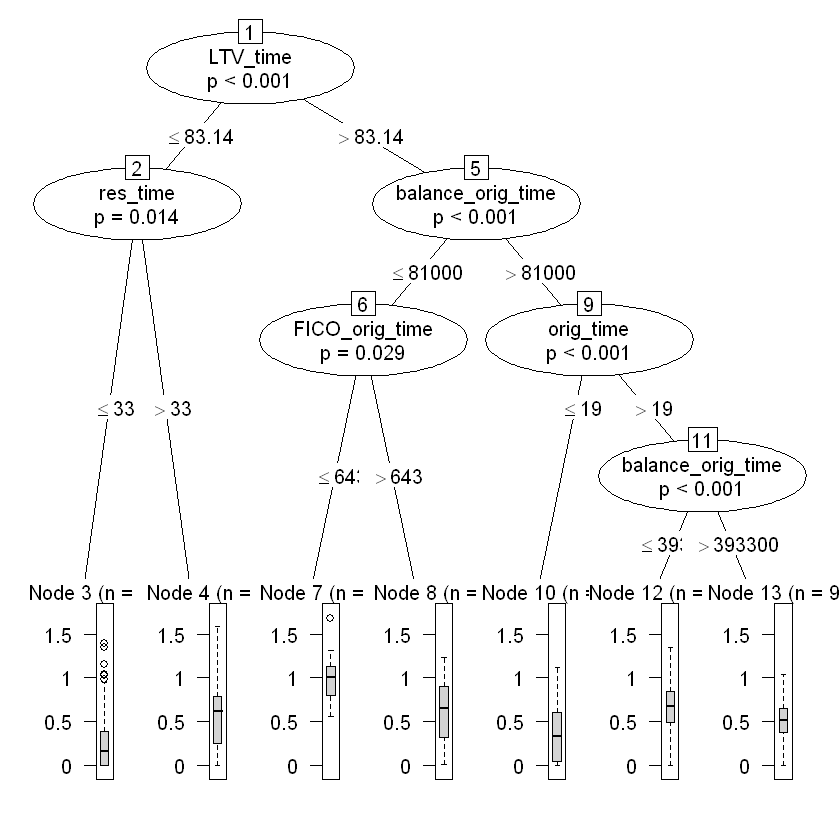

In [1104]:
plot(lgd_da_2)

In [1111]:
lgd_da_3 <- ctree(lgd_time ~res_diff -res_sold + ., data=train, subset = predict(lgd_da_1, type = 'node') == 3)

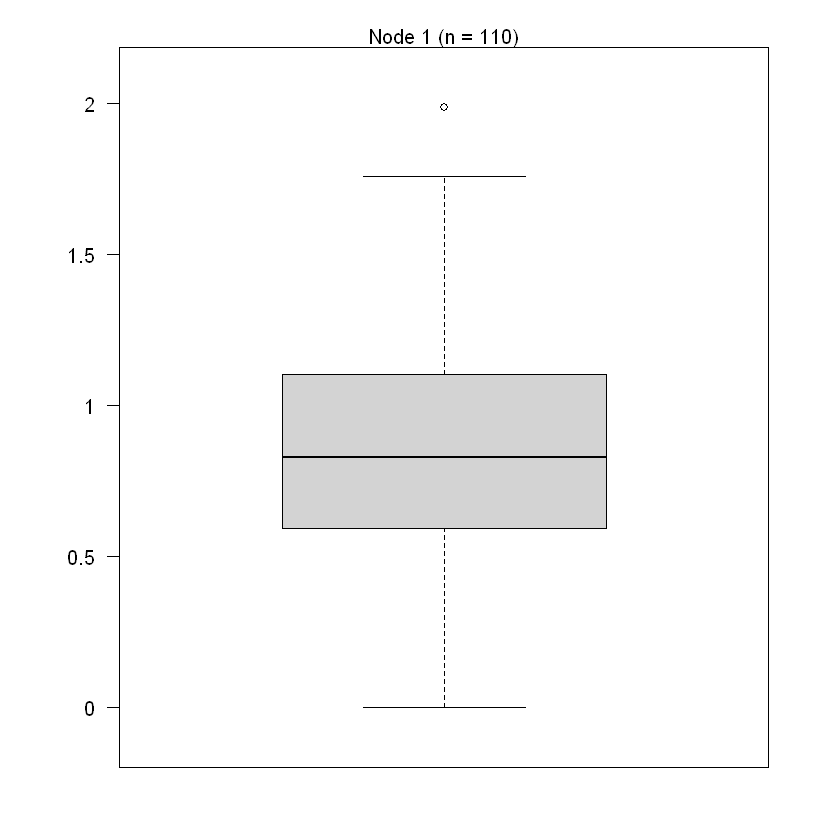

In [1113]:
plot(lgd_da_3)

### Conditional Evaluation of Loss Severity given Probability of Cure

In [1343]:
# filtering loans that defaulted
data_modelling <- subset(data, (data[,"status_time"] == 1))

In [1344]:
# A loan that deafaulted and was not cured (resolution)
data_modelling$res_sold <- 1

In [1345]:
# A loan that deafaulted and was cured (no resolution)
data_modelling$res_sold[is.na(data_modelling[,"res_time"])] <- 0

In [1346]:
# time elapsed between bankruptcy and resolution
data_modelling$res_diff <- data_modelling$res_time - data_modelling$time

In [1347]:
data_modelling$res_diff <- cut(data_modelling$res_diff, breaks=c(-1,12,38))

In [1349]:
# selecting predictors and dependent variable(res_sold)
data_modelling <- dplyr::select(data_modelling, 2:8,14:16,18:20,22,27:31)

In [1351]:
# deleting resolution timestamp and resolution amount
data_modelling <- data_modelling[,-c(5,14,16)]

In [1352]:
str(data_modelling)

'data.frame':	1525 obs. of  16 variables:
 $ time               : int  37 37 40 31 31 33 31 32 42 41 ...
 $ orig_time          : int  18 25 21 21 23 27 26 27 27 28 ...
 $ first_time         : int  25 33 25 25 26 28 28 32 32 32 ...
 $ mat_time           : int  138 141 141 142 143 147 147 148 148 228 ...
 $ balance_time       : num  130140 127859 84387 227000 223885 ...
 $ LTV_time           : num  99.1 101.4 102.6 67.5 87.2 ...
 $ REtype_CO_orig_time: int  0 0 0 0 0 1 0 0 0 0 ...
 $ REtype_PU_orig_time: int  0 0 0 0 0 0 0 0 0 0 ...
 $ REtype_SF_orig_time: int  1 1 1 1 1 0 1 1 1 1 ...
 $ balance_orig_time  : num  128000 129500 88000 227000 227200 ...
 $ FICO_orig_time     : int  501 536 556 622 630 613 605 596 633 587 ...
 $ LTV_orig_time      : num  80 69.6 80 64.9 80 80 80 71.1 90 80 ...
 $ lgd_time           : num  0.00784 0 0 0 0.88392 ...
 $ mat_diff           : int  120 116 120 121 120 120 121 121 121 200 ...
 $ res_sold           : num  0 0 0 0 1 1 1 0 1 0 ...
 $ res_diff         

In [1353]:
# deleting row with NA observation
data_modelling <- data_modelling[!is.na(data_modelling['LTV_time']),]

In [1354]:
# changing variables types
data_modelling[colnames(data_modelling[,c(7:9)])] <- lapply(data_modelling[colnames(data_modelling[,c(7:9)])], factor)

In [1355]:
data_modelling$res_sold <- as.factor(data_modelling$res_sold)

In [1156]:
# data_modelling$state_orig_time <- as.factor(data_modelling$state_orig_time)

In [1146]:
# dropping missing observations(1)
# data_modelling <- data_modelling %>% drop_na()

In [1356]:
set.seed(101) 

In [1357]:
train_index <- caret::createDataPartition(data_modelling$res_sold, p = .7, list = FALSE)

In [1358]:
train <- data_modelling[ train_index,]
test <- data_modelling[-train_index,]

In [1359]:
lgd_da_1 <- ctree(res_sold~.-res_diff-lgd_time,data=train)

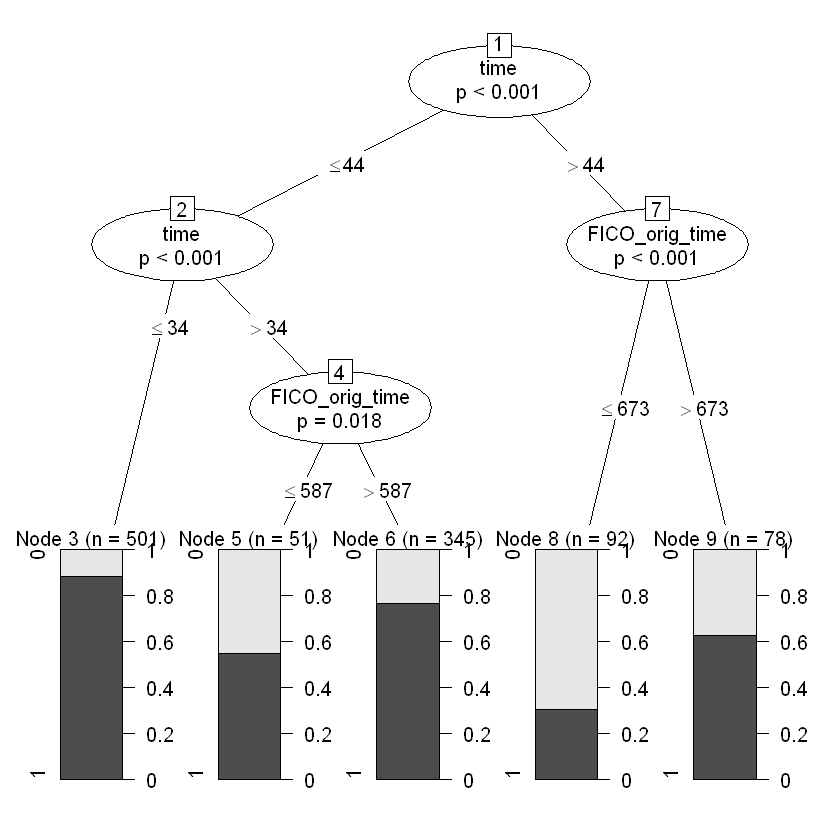

In [1360]:
plot(lgd_da_1)

In [1361]:
lgd_da_2 <- ctree(lgd_time ~res_diff, data=train, subset = predict(lgd_da_1, type = 'node') == 3)

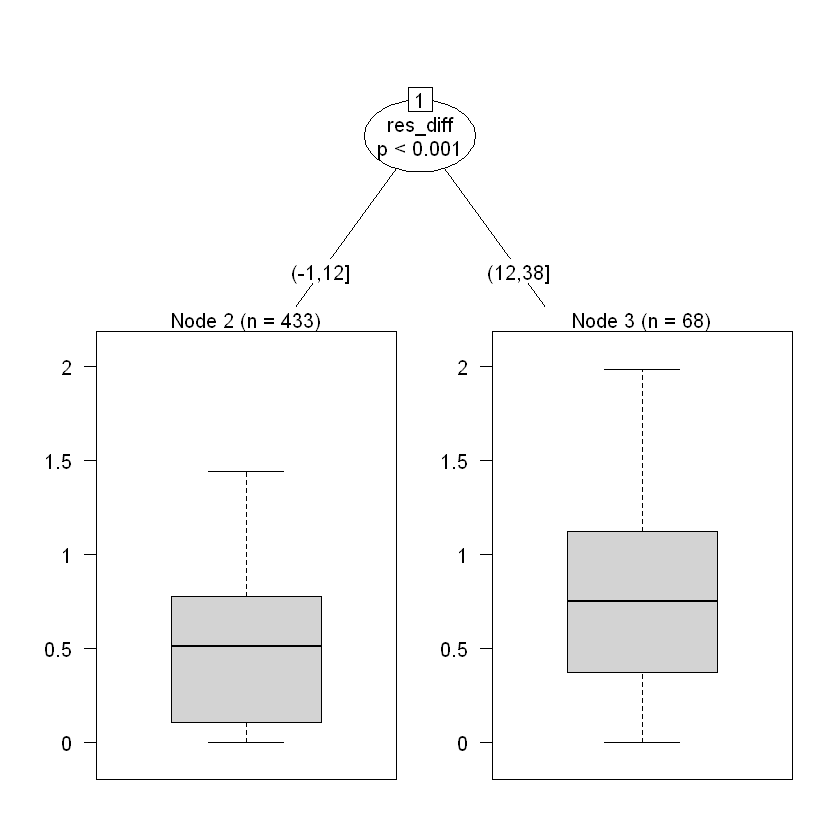

In [1362]:
plot(lgd_da_2)

In [1371]:
lgd_da_3 <- ctree(lgd_time ~res_diff, data=train, subset = predict(lgd_da_1, type = 'node') == 6)

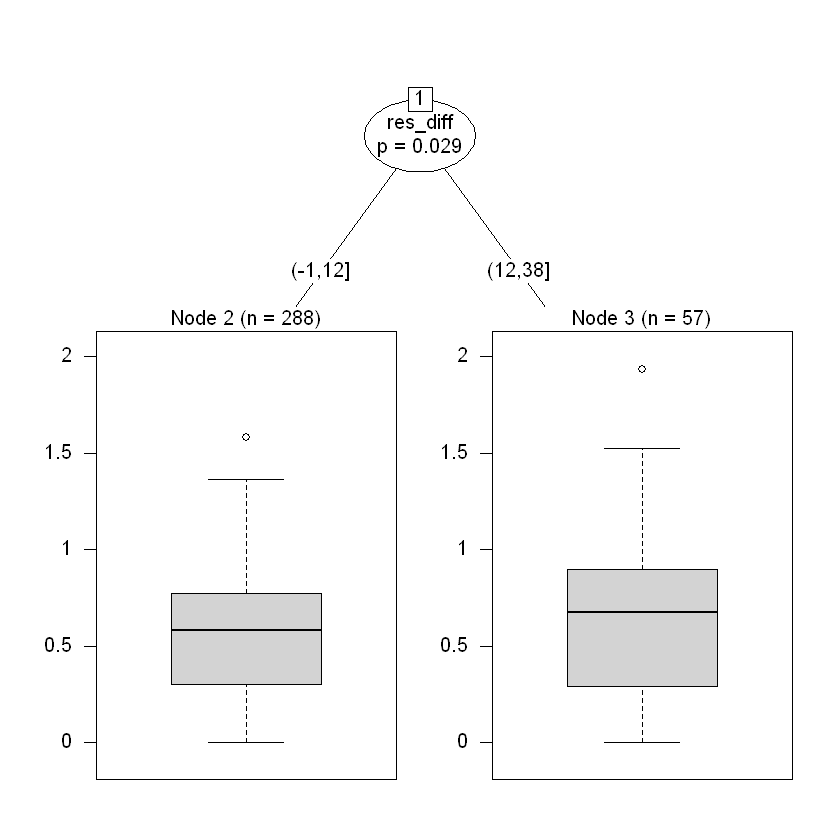

In [1372]:
plot(lgd_da_3)

### LGD with Macroeconomic Variables

In [1390]:
# filtering loans that defaulted
data_modelling <- subset(data, (data[,"status_time"] == 1))

In [1391]:
# selecting predictors and dependent variable(res_sold)
data_modelling <- dplyr::select(data_modelling, 2:23,27:29)

In [1392]:
# deleting resolution timestamp and resolution amount
data_modelling <- data_modelling[,-c(5,9,16,28)]

In [1402]:
str(data_modelling)

'data.frame':	1525 obs. of  22 variables:
 $ time                   : int  37 37 40 31 31 33 31 32 42 41 ...
 $ orig_time              : int  18 25 21 21 23 27 26 27 27 28 ...
 $ first_time             : int  25 33 25 25 26 28 28 32 32 32 ...
 $ mat_time               : int  138 141 141 142 143 147 147 148 148 228 ...
 $ balance_time           : num  130140 127859 84387 227000 223885 ...
 $ LTV_time               : num  99.1 101.4 102.6 67.5 87.2 ...
 $ interest_rate_time     : num  8 7 7.81 7.33 7.36 ...
 $ hpi_time               : num  153 153 156 201 201 ...
 $ gdp_time               : num  -4.15 -4.15 1.59 1.85 1.85 ...
 $ uer_time               : num  9 9 9.8 4.7 4.7 5 4.7 5 9.4 9.9 ...
 $ REtype_CO_orig_time    : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 1 1 1 1 ...
 $ REtype_PU_orig_time    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ REtype_SF_orig_time    : Factor w/ 2 levels "0","1": 2 2 2 2 2 1 2 2 2 2 ...
 $ balance_orig_time      : num  128000 129500 88000 227000

In [1394]:
# changing variables types
data_modelling[colnames(data_modelling[,c(11:13)])] <- lapply(data_modelling[colnames(data_modelling[,c(11:13)])], factor)

In [1395]:
data_modelling$state_orig_time <- as.factor(data_modelling$state_orig_time)

In [1397]:
set.seed(101) 

In [1398]:
train_index <- caret::createDataPartition(data_modelling$lgd_time, p = .7, list = FALSE)

In [1399]:
train <- data_modelling[ train_index,]
test <- data_modelling[-train_index,]

In [1403]:
lgd.lm.full <- lm(lgd_time~interest_rate_time+hpi_time+gdp_time+ uer_time+Interest_Rate_orig_time+hpi_orig_time, data = train)

In [1404]:
summary(lgd.lm.full)


Call:
lm(formula = lgd_time ~ interest_rate_time + hpi_time + gdp_time + 
    uer_time + Interest_Rate_orig_time + hpi_orig_time, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72028 -0.29984  0.01051  0.25702  1.72221 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -0.4445714  0.2181519  -2.038   0.0418 *  
interest_rate_time       0.0333059  0.0065365   5.095 4.12e-07 ***
hpi_time                 0.0009143  0.0008060   1.134   0.2569    
gdp_time                -0.0136843  0.0057286  -2.389   0.0171 *  
uer_time                 0.0071871  0.0099126   0.725   0.4686    
Interest_Rate_orig_time  0.0041546  0.0034385   1.208   0.2272    
hpi_orig_time            0.0022013  0.0004212   5.226 2.08e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3703 on 1062 degrees of freedom
Multiple R-squared:  0.06535,	Adjusted R-squared:  0.06007 
F-statistic: 

In [1405]:
lgd.stepwise<- stepAIC(lgd.lm.full, direction = 'both')

Start:  AIC=-2117.15
lgd_time ~ interest_rate_time + hpi_time + gdp_time + uer_time + 
    Interest_Rate_orig_time + hpi_orig_time

                          Df Sum of Sq    RSS     AIC
- uer_time                 1    0.0721 145.68 -2118.6
- hpi_time                 1    0.1764 145.78 -2117.8
- Interest_Rate_orig_time  1    0.2002 145.80 -2117.7
<none>                                 145.60 -2117.2
- gdp_time                 1    0.7823 146.39 -2113.4
- interest_rate_time       1    3.5596 149.16 -2093.3
- hpi_orig_time            1    3.7449 149.35 -2092.0

Step:  AIC=-2118.62
lgd_time ~ interest_rate_time + hpi_time + gdp_time + Interest_Rate_orig_time + 
    hpi_orig_time

                          Df Sum of Sq    RSS     AIC
- hpi_time                 1    0.1095 145.78 -2119.8
- Interest_Rate_orig_time  1    0.2133 145.89 -2119.1
<none>                                 145.68 -2118.6
+ uer_time                 1    0.0721 145.60 -2117.2
- gdp_time                 1    0.7368 146.41

In [1406]:
summary(lgd.stepwise)


Call:
lm(formula = lgd_time ~ interest_rate_time + gdp_time + hpi_orig_time, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73876 -0.29407  0.01211  0.25781  1.70339 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.2530396  0.1064035  -2.378   0.0176 *  
interest_rate_time  0.0357288  0.0057482   6.216 7.33e-10 ***
gdp_time           -0.0109021  0.0049830  -2.188   0.0289 *  
hpi_orig_time       0.0023106  0.0004149   5.568 3.25e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3702 on 1065 degrees of freedom
Multiple R-squared:  0.063,	Adjusted R-squared:  0.06036 
F-statistic: 23.87 on 3 and 1065 DF,  p-value: 5.916e-15


#### Macroeconomic variables with time lead

In [1440]:
mv_lead <- train[order(train['time']),]

In [1441]:
mv_lead<-subset(mv_lead, select=c(1,7:10,17,19))

In [1442]:
str(mv_lead)

'data.frame':	1069 obs. of  7 variables:
 $ time                   : int  3 4 5 6 6 7 7 7 9 10 ...
 $ interest_rate_time     : num  10.9 13.5 12.6 11.7 10.8 ...
 $ hpi_time               : num  114 117 120 123 123 ...
 $ gdp_time               : num  2.848 2.273 0.931 0.494 0.494 ...
 $ uer_time               : num  3.9 4.2 4.4 4.6 4.6 5.3 5.3 5.3 5.9 5.8 ...
 $ Interest_Rate_orig_time: num  10.9 13.5 12.6 11.7 0 ...
 $ hpi_orig_time          : num  113.6 110.9 110.9 113.6 91.3 ...


In [1443]:
# unique observations based on time
mv_lead <- mv_lead[!duplicated(mv_lead[,c(1)]),]

In [1444]:
# gdp_lead <- matrix(0,nrow(gdp_lead),1)

In [1446]:
# for(i in 1:nrow(mv_lead))
# {
# gdp_lead[i] <-0.33*(mv_lead$gdp_time[i+1]+mv_lead$gdp_time[i+2]+mv_lead$gdp_time[i+3])
# }

In [1459]:
# gdp_lead <- cbind(mv_lead$time, gdp_lead)

In [1461]:
# gdp_lead <- as.data.frame(gdp_lead)

In [1469]:
# gdp_lead <-gdp_lead %>% 
#             rename(
#             time = V1,
#             gdp_lead = V2)

In [1513]:
time <- mv_lead$time[1:54]

In [1564]:
# moving average from 12 periods after bankruptcy
# for cases for which data is unavailable for that number of periods, at least 3 periods
# E.g if data is accessible for 13 next periods, then MA from 12 periods, if for 9 periods, then from 9 periods, if for 8 periods, then from 8 periods etc.
mv_lead <- rollapply(mv_lead[2:7], width=12, FUN=mean, align = "left", partial=3)

In [1565]:
mv_lead <- cbind(time, mv_lead)

##### Default event prediction

In [1566]:
# filtering loans that defaulted
data_modelling <- subset(data, (data[,"status_time"] >= 1))

In [1567]:
data_modelling$status_time <- ifelse(data_modelling$status_time == 1,1,0)

In [1568]:
data_modelling_mv <- merge(data_modelling, mv_lead,by='time')

In [1569]:
set.seed(101) 

In [1570]:
train_index <- caret::createDataPartition(data_modelling_mv$status_time, p = .7, list = FALSE)

In [1571]:
train <- data_modelling_mv[ train_index,]
test <- data_modelling_mv[-train_index,]

In [1577]:
lgd.lm.lead.ma <- lm(status_time~gdp_time.y, data = train)

##### Loss severity given default

In [1579]:
# filtering loans that defaulted
data_modelling <- subset(data, (data[,"status_time"] == 1))

In [1580]:
data_modelling_mv <- merge(data_modelling, mv_lead,by='time')

In [1581]:
str(data_modelling_mv)

'data.frame':	1513 obs. of  35 variables:
 $ time                     : int  3 3 4 4 5 5 5 6 6 6 ...
 $ id                       : int  8184 8250 8039 8008 9298 7967 8155 18068 8417 9340 ...
 $ orig_time                : int  3 3 2 2 2 2 3 -4 3 2 ...
 $ first_time               : int  3 3 2 2 2 2 3 1 3 2 ...
 $ mat_time                 : int  120 119 119 119 120 119 119 117 121 58 ...
 $ res_time                 : int  11 11 9 22 16 20 22 7 22 22 ...
 $ balance_time             : num  119390 41172 81724 68155 81017 ...
 $ LTV_time                 : num  89.8 74.9 66.4 75.7 59.9 ...
 $ interest_rate_time.x     : num  10.9 13 13.5 9.9 12.6 ...
 $ rate_time                : num  5.12 5.12 5.8 5.8 5.8 5.8 5.12 5.25 5.12 5.8 ...
 $ hpi_time.x               : num  114 114 117 117 120 ...
 $ gdp_time.x               : num  2.848 2.848 2.273 2.273 0.931 ...
 $ uer_time.x               : num  3.9 3.9 4.2 4.2 4.4 4.4 4.4 4.6 4.6 4.6 ...
 $ REtype_CO_orig_time      : int  0 0 0 0 0 0 0 0 0 0 ...


In [1582]:
set.seed(101) 

In [1583]:
train_index <- caret::createDataPartition(data_modelling_mv$time, p = .7, list = FALSE)

In [1584]:
train <- data_modelling_mv[ train_index,]
test <- data_modelling_mv[-train_index,]

In [1587]:
lgd.lm.lead.ma <- lm(lgd_time~interest_rate_time.y+hpi_time.y+gdp_time.y+ uer_time.y+Interest_Rate_orig_time.y+hpi_orig_time.y, data = train)

In [1588]:
summary(lgd.lm.lead.ma)


Call:
lm(formula = lgd_time ~ interest_rate_time.y + hpi_time.y + gdp_time.y + 
    uer_time.y + Interest_Rate_orig_time.y + hpi_orig_time.y, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63398 -0.27837  0.01057  0.24948  1.67374 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)   
(Intercept)               -0.379454   0.582036  -0.652  0.51458   
interest_rate_time.y       0.083676   0.033723   2.481  0.01325 * 
hpi_time.y                -0.006600   0.003080  -2.143  0.03236 * 
gdp_time.y                 0.026679   0.038670   0.690  0.49040   
uer_time.y                -0.015166   0.040811  -0.372  0.71025   
Interest_Rate_orig_time.y -0.016028   0.026989  -0.594  0.55273   
hpi_orig_time.y            0.007473   0.002767   2.701  0.00703 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3638 on 1053 degrees of freedom
Multiple R-squared:  0.07522,	Adjusted R-squared:  0.069

### Tobit Regression

In [1726]:
# filtering loans that defaulted
data_modelling <- subset(data, (data[,"status_time"] == 1))

In [1727]:
# A loan that deafaulted and was not cured (resolution)
data_modelling$res_sold <- 1

In [1728]:
# A loan that deafaulted and was cured (no resolution)
data_modelling$res_sold[is.na(data_modelling[,"res_time"])] <- 0

In [1729]:
# selecting predictors and dependent variable(res_sold)
data_modelling <- dplyr::select(data_modelling, 2:8,14:16,18:20,22,27:30)

In [1730]:
# deleting resolution timestamp and resolution amount
data_modelling <- data_modelling[,-c(5,16)]

In [1731]:
str(data_modelling)

'data.frame':	1525 obs. of  16 variables:
 $ time               : int  37 37 40 31 31 33 31 32 42 41 ...
 $ orig_time          : int  18 25 21 21 23 27 26 27 27 28 ...
 $ first_time         : int  25 33 25 25 26 28 28 32 32 32 ...
 $ mat_time           : int  138 141 141 142 143 147 147 148 148 228 ...
 $ balance_time       : num  130140 127859 84387 227000 223885 ...
 $ LTV_time           : num  99.1 101.4 102.6 67.5 87.2 ...
 $ REtype_CO_orig_time: int  0 0 0 0 0 1 0 0 0 0 ...
 $ REtype_PU_orig_time: int  0 0 0 0 0 0 0 0 0 0 ...
 $ REtype_SF_orig_time: int  1 1 1 1 1 0 1 1 1 1 ...
 $ balance_orig_time  : num  128000 129500 88000 227000 227200 ...
 $ FICO_orig_time     : int  501 536 556 622 630 613 605 596 633 587 ...
 $ LTV_orig_time      : num  80 69.6 80 64.9 80 80 80 71.1 90 80 ...
 $ state_orig_time    : chr  "GA" "FL" "OH" "NY" ...
 $ lgd_time           : num  0.00784 0 0 0 0.88392 ...
 $ mat_diff           : int  120 116 120 121 120 120 121 121 121 200 ...
 $ res_sold         

In [1732]:
# deleting row with NA observation
data_modelling <- data_modelling[!is.na(data_modelling['LTV_time']),]

In [1733]:
# changing variables types
data_modelling[colnames(data_modelling[,c(7:9)])] <- lapply(data_modelling[colnames(data_modelling[,c(7:9)])], factor)

In [1734]:
data_modelling$res_sold <- as.factor(data_modelling$res_sold)

In [1735]:
data_modelling$state_orig_time <- as.factor(data_modelling$state_orig_time)

In [1736]:
# dropping missing observations(1)
# data_modelling <- data_modelling %>% drop_na()

In [1737]:
set.seed(101) 

In [1738]:
train_index <- caret::createDataPartition(data_modelling$res_sold, p = .7, list = FALSE)

In [1739]:
train <- data_modelling[ train_index,]
test <- data_modelling[-train_index,]

In [1742]:
# Fitting tobit regression
fit_tobit <- tobit(lgd_time ~ LTV_time+time, data = train)

In [1743]:
summary(fit_tobit)


Call:
tobit(formula = lgd_time ~ LTV_time + time, data = train)

Observations:
         Total  Left-censored     Uncensored Right-censored 
          1067            212            855              0 

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.2777526  0.0761035   3.650 0.000263 ***
LTV_time     0.0048864  0.0007484   6.529 6.61e-11 ***
time        -0.0084894  0.0018299  -4.639 3.49e-06 ***
Log(scale)  -0.7865767  0.0254575 -30.898  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Scale: 0.4554 

Gaussian distribution
Number of Newton-Raphson Iterations: 3 
Log-likelihood: -759.9 on 4 Df
Wald-statistic: 47.05 on 2 Df, p-value: 6.0583e-11 


In [1744]:
# Tobit function that has been used doesn't automatically rescale the outcomes
range(predict(fit_tobit), train$lgd_time)

[1] -0.01512448  2.02276715

In [1745]:
# A rescaling adjustment is performed as follows:

In [1746]:
mu <- predict(fit_tobit, newdata=train)

In [1747]:
sigma <- fit_tobit$scale

In [1748]:
p0 <- pnorm(mu/sigma)

In [1622]:
lambda <- function(x) dnorm(x)/pnorm(x)

In [1750]:
predicted_loss <- mu + sigma * lambda(mu/sigma)

In [1751]:
predicted_loss <- p0 * predicted_loss

In [1752]:
train$predicted_loss <- predicted_loss

In [1753]:
train <- tibble::rowid_to_column(train, "id")

In [1754]:
# actual mean lgd given the cure event
mean(train[train['res_sold']==0,][,'lgd_time'])

[1] 0.188711

In [1756]:
# predicted mean lgd given the cure event
mean(train[train['res_sold']==0,][,'predicted_loss'])

[1] 0.4616084

In [1757]:
# actual mean lgd given no-cure
mean(train[train['res_sold']==1,][,'lgd_time'])

[1] 0.5949845

In [1758]:
# predicted mean lgd given no-cure
mean(train[train['res_sold']==1,][,'predicted_loss'])

[1] 0.4987468

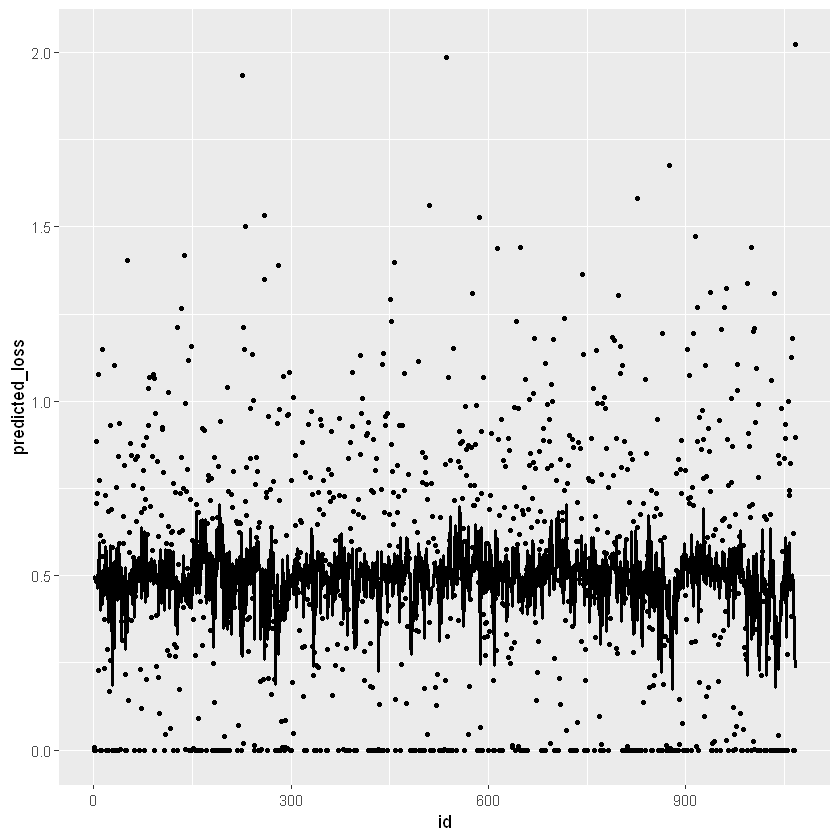

In [1759]:
ggplot()+
    geom_line(data=train,aes(y=predicted_loss,x=id),size=1 ) +
    geom_point(data=train,aes(y=lgd_time,x=id),size=1)

In [ ]:
# The model does not seem to accurately capture lgd of cured accounts;
# However because of relatively small percentage of cured accounts the model quite well captures lgd of non-cured accounts

### Beta Regression

In [2044]:
# filtering loans that defaulted
data_modelling <- subset(data, (data[,"status_time"] == 1))

In [2045]:
# A loan that deafaulted and was not cured (resolution)
data_modelling$res_sold <- 1

In [2046]:
# A loan that deafaulted and was cured (no resolution)
data_modelling$res_sold[is.na(data_modelling[,"res_time"])] <- 0

In [2047]:
# Beta distribution is defined within the interval (0,1), because of that lgds values, which are not within this interval are changed
# new variable (lgd_new) with changed lgd is created 
data_modelling <- data_modelling %>%
dplyr::mutate(lgd_new= ifelse(lgd_time>=1,0.9999,
no=ifelse(lgd_time<=0,0.0001,lgd_time)))

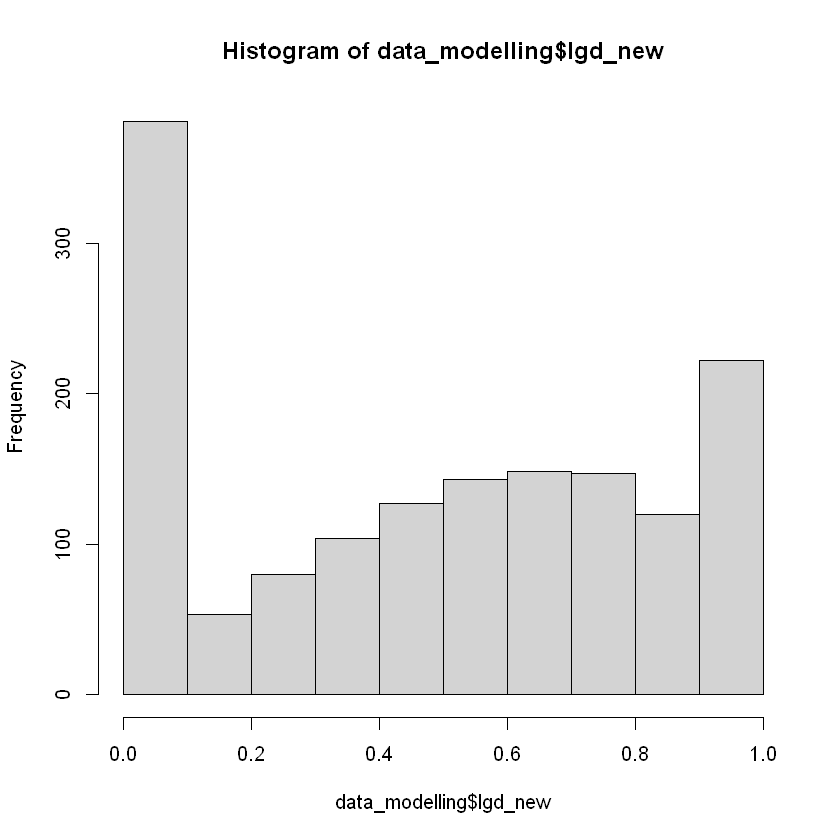

In [2048]:
hist(data_modelling$lgd_new)

In [2049]:
# selecting predictors and dependent variable(lgd_time)
data_modelling <- dplyr::select(data_modelling, 2:8,14:16,18:20,22,27:31)

In [2050]:
# deleting resolution timestamp and resolution amount
data_modelling <- data_modelling[,-c(5,16)]

In [2051]:
str(data_modelling)

'data.frame':	1525 obs. of  17 variables:
 $ time               : int  37 37 40 31 31 33 31 32 42 41 ...
 $ orig_time          : int  18 25 21 21 23 27 26 27 27 28 ...
 $ first_time         : int  25 33 25 25 26 28 28 32 32 32 ...
 $ mat_time           : int  138 141 141 142 143 147 147 148 148 228 ...
 $ balance_time       : num  130140 127859 84387 227000 223885 ...
 $ LTV_time           : num  99.1 101.4 102.6 67.5 87.2 ...
 $ REtype_CO_orig_time: int  0 0 0 0 0 1 0 0 0 0 ...
 $ REtype_PU_orig_time: int  0 0 0 0 0 0 0 0 0 0 ...
 $ REtype_SF_orig_time: int  1 1 1 1 1 0 1 1 1 1 ...
 $ balance_orig_time  : num  128000 129500 88000 227000 227200 ...
 $ FICO_orig_time     : int  501 536 556 622 630 613 605 596 633 587 ...
 $ LTV_orig_time      : num  80 69.6 80 64.9 80 80 80 71.1 90 80 ...
 $ state_orig_time    : chr  "GA" "FL" "OH" "NY" ...
 $ lgd_time           : num  0.00784 0 0 0 0.88392 ...
 $ mat_diff           : int  120 116 120 121 120 120 121 121 121 200 ...
 $ res_sold         

In [2052]:
# deleting row with NA observation
data_modelling <- data_modelling[!is.na(data_modelling['LTV_time']),]

In [2053]:
# changing variables types
data_modelling[colnames(data_modelling[,c(7:9)])] <- lapply(data_modelling[colnames(data_modelling[,c(7:9)])], factor)

In [2054]:
data_modelling$res_sold <- as.factor(data_modelling$res_sold)

In [2055]:
data_modelling$state_orig_time <- as.factor(data_modelling$state_orig_time)

In [2056]:
set.seed(101) 

In [2057]:
train_index <- caret::createDataPartition(data_modelling$res_sold, p = .7, list = FALSE)

In [2058]:
train <- data_modelling[ train_index,]
test <- data_modelling[-train_index,]

In [2059]:
fit_beta <- betareg(lgd_new ~ LTV_time+time+state_orig_time, data = train)

In [2060]:
# different types of residuals can be used 
summary(fit_beta, type = 'sweighted')


Call:
betareg(formula = lgd_new ~ LTV_time + time + state_orig_time, data = train)

Standardized weighted residuals:
    Min      1Q  Median      3Q     Max 
-2.3218 -0.3445  0.1631  0.4703  2.3215 

Coefficients (mean model with logit link):
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)        0.708776   0.728103   0.973 0.330327    
LTV_time           0.013168   0.002095   6.285 3.27e-10 ***
time              -0.019205   0.004986  -3.851 0.000117 ***
state_orig_timeAK -1.954331   1.392845  -1.403 0.160581    
state_orig_timeAL -1.683873   0.853674  -1.973 0.048552 *  
state_orig_timeAR -1.777007   1.171794  -1.516 0.129397    
state_orig_timeAZ -1.418914   0.751445  -1.888 0.058993 .  
state_orig_timeCA -1.615909   0.727679  -2.221 0.026376 *  
state_orig_timeCO -1.923784   0.784423  -2.452 0.014187 *  
state_orig_timeCT -2.032892   0.889868  -2.284 0.022343 *  
state_orig_timeDC -2.394691   0.997383  -2.401 0.016351 *  
state_orig_timeDE -1.972123   1.1469

In [1778]:
train <- tibble::rowid_to_column(train, "id")

In [1779]:
beta_predicted <- predict(fit_beta, newdata = train)

In [1780]:
train$predicted_loss <- beta_predicted

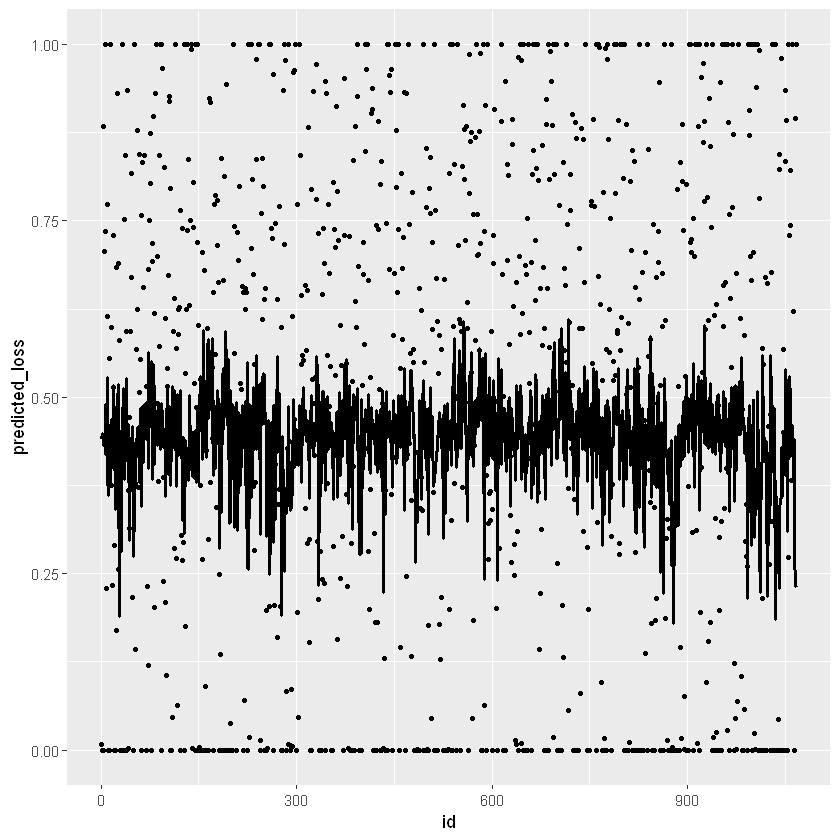

In [1781]:
ggplot()+
    geom_line(data=train,aes(y=predicted_loss,x=id),size=1) +
    geom_point(data=train,aes(y=lgd_new,x=id),size=1)

In [ ]:
# The variability of model's prediction is much greater comparing to tobit model
# The pseudo R-squared is still very low

### Mitxure-model Approach

In [2007]:
# filtering loans that defaulted
data_modelling <- subset(data, (data[,"status_time"] == 1))

In [2008]:
# A loan that deafaulted and was not cured (resolution)
data_modelling$res_sold <- 1

In [2009]:
# A loan that deafaulted and was cured (no resolution)
data_modelling$res_sold[is.na(data_modelling[,"res_time"])] <- 0

In [2010]:
# selecting predictors and dependent variable(lgd_time)
data_modelling <- dplyr::select(data_modelling, 2:8,14:16,18:20,22,27:30)

In [2011]:
# deleting resolution timestamp and resolution amount
data_modelling <- data_modelling[,-c(5,16)]

In [2012]:
str(data_modelling)

'data.frame':	1525 obs. of  16 variables:
 $ time               : int  37 37 40 31 31 33 31 32 42 41 ...
 $ orig_time          : int  18 25 21 21 23 27 26 27 27 28 ...
 $ first_time         : int  25 33 25 25 26 28 28 32 32 32 ...
 $ mat_time           : int  138 141 141 142 143 147 147 148 148 228 ...
 $ balance_time       : num  130140 127859 84387 227000 223885 ...
 $ LTV_time           : num  99.1 101.4 102.6 67.5 87.2 ...
 $ REtype_CO_orig_time: int  0 0 0 0 0 1 0 0 0 0 ...
 $ REtype_PU_orig_time: int  0 0 0 0 0 0 0 0 0 0 ...
 $ REtype_SF_orig_time: int  1 1 1 1 1 0 1 1 1 1 ...
 $ balance_orig_time  : num  128000 129500 88000 227000 227200 ...
 $ FICO_orig_time     : int  501 536 556 622 630 613 605 596 633 587 ...
 $ LTV_orig_time      : num  80 69.6 80 64.9 80 80 80 71.1 90 80 ...
 $ state_orig_time    : chr  "GA" "FL" "OH" "NY" ...
 $ lgd_time           : num  0.00784 0 0 0 0.88392 ...
 $ mat_diff           : int  120 116 120 121 120 120 121 121 121 200 ...
 $ res_sold         

In [2013]:
# deleting row with NA observation
data_modelling <- data_modelling[!is.na(data_modelling['LTV_time']),]

In [2014]:
# changing variables types
data_modelling[colnames(data_modelling[,c(7:9)])] <- lapply(data_modelling[colnames(data_modelling[,c(7:9)])], factor)

In [2015]:
data_modelling$res_sold <- as.factor(data_modelling$res_sold)

In [2016]:
data_modelling$state_orig_time <- as.factor(data_modelling$state_orig_time)

In [2017]:
# dummy variable lgd_1
# lgd_1 = 1, if lgd was 100% or more
data_modelling$lgd_1<-dplyr::if_else(data_modelling$lgd_time >= 1,1,0)

In [2018]:
# dummy variable lgd_0
# lgd_0 = 1, if lgd was 0% or less
data_modelling$lgd_0<-dplyr::if_else(data_modelling$lgd_time <= 0,1,0)

In [2019]:
# dummy variable lgd_diff
# lgd_diff = 1, if lgd was in interval (0,1)
data_modelling$lgd_diff<-dplyr::if_else(data_modelling$lgd_time < 1 & data_modelling$lgd_time > 0,1,0)

In [2020]:
# changing variables types
data_modelling[colnames(data_modelling[,c(17:19)])] <- lapply(data_modelling[colnames(data_modelling[,c(17:19)])], factor)

In [2021]:
set.seed(101) 

In [2022]:
train_index <- caret::createDataPartition(data_modelling$lgd_time, p = .7, list = FALSE)

In [2023]:
train <- data_modelling[ train_index,]
test <- data_modelling[-train_index,]

In [2024]:
lgd_da_1 <- ctree(lgd_time~lgd_1,data=train,maxdepth = 1)

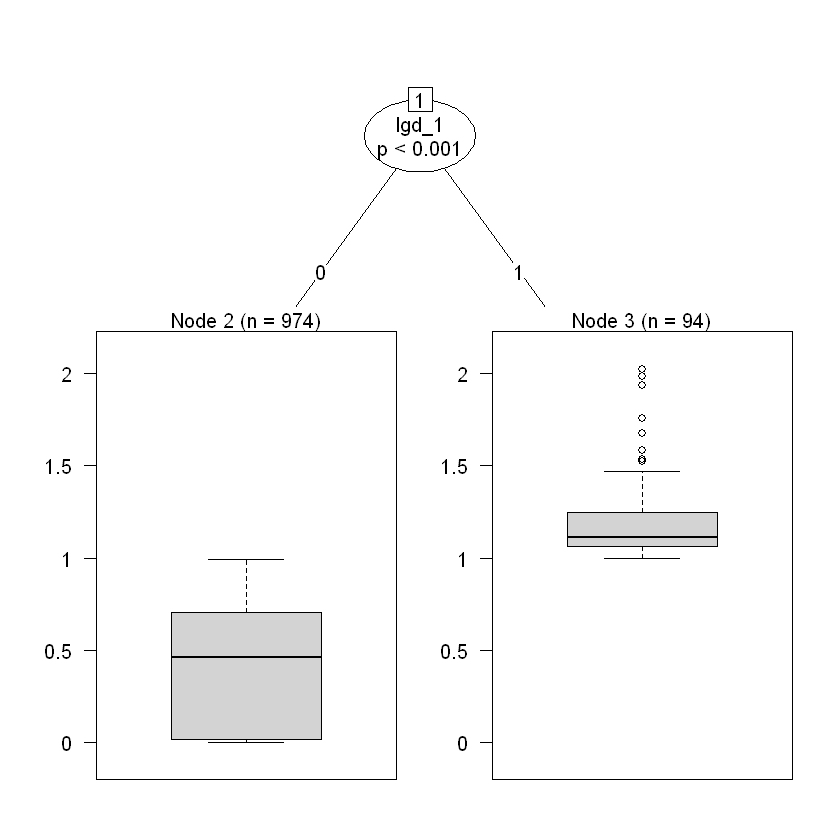

In [2025]:
plot(lgd_da_1)

In [2026]:
# modelling lgd => 1
lgd_da_2 <- ctree(lgd_time ~ .-res_sold-lgd_1-lgd_0-lgd_diff, data=train, subset = predict(lgd_da_1, type = 'node') == 3)

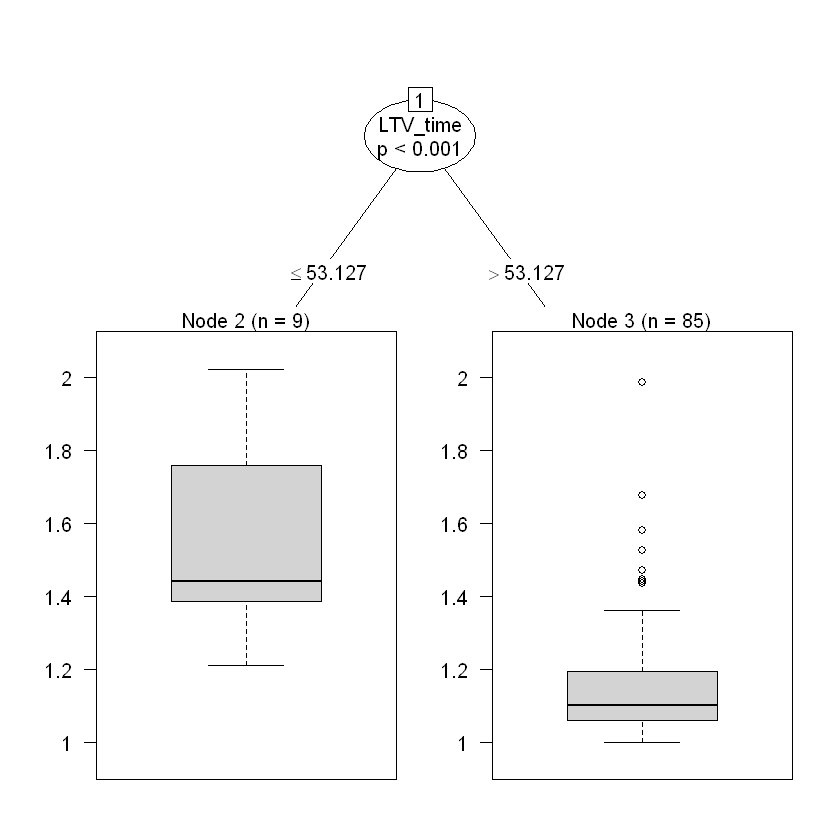

In [2027]:
plot(lgd_da_2)

In [2028]:
# modelling lgd <= 1

In [2029]:
lgd_da_3 <- ctree(lgd_time ~ lgd_0, data=train, subset = predict(lgd_da_1, type = 'node') == 2)

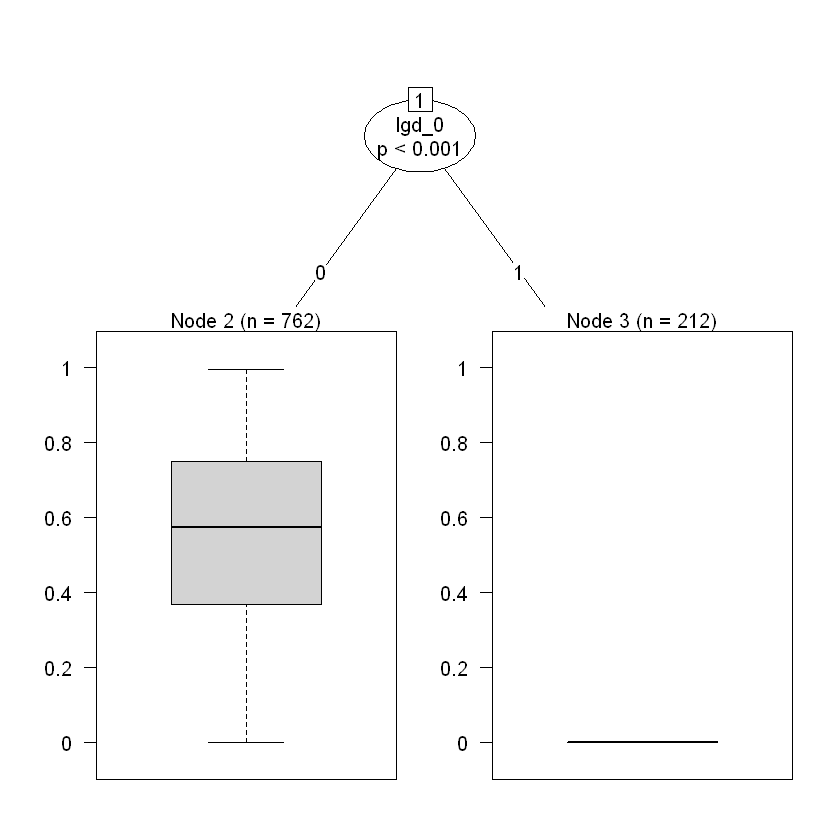

In [2030]:
plot(lgd_da_3)

In [2031]:
# In node 3 all lgd = 0 

In [2032]:
lgd_da_4 <- ctree(lgd_time ~ lgd_diff, data = train)

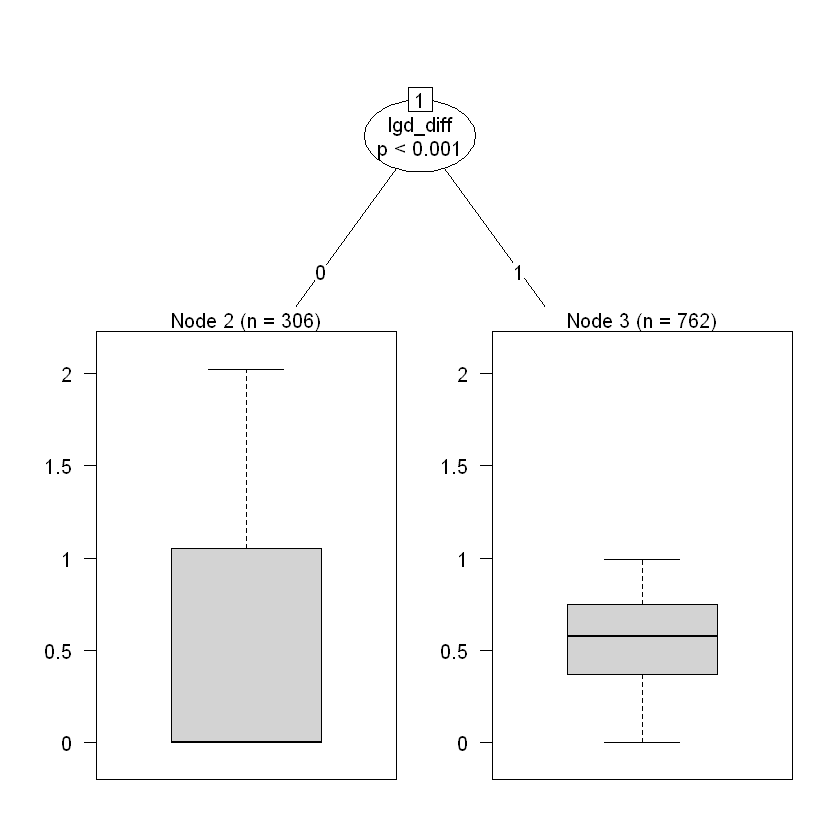

In [2033]:
plot(lgd_da_4)

In [2034]:
lgd_da_5 <- ctree(lgd_time ~ .-res_sold-lgd_1-lgd_0-lgd_diff-state_orig_time, data=train, subset = predict(lgd_da_4, type = 'node') == 3)

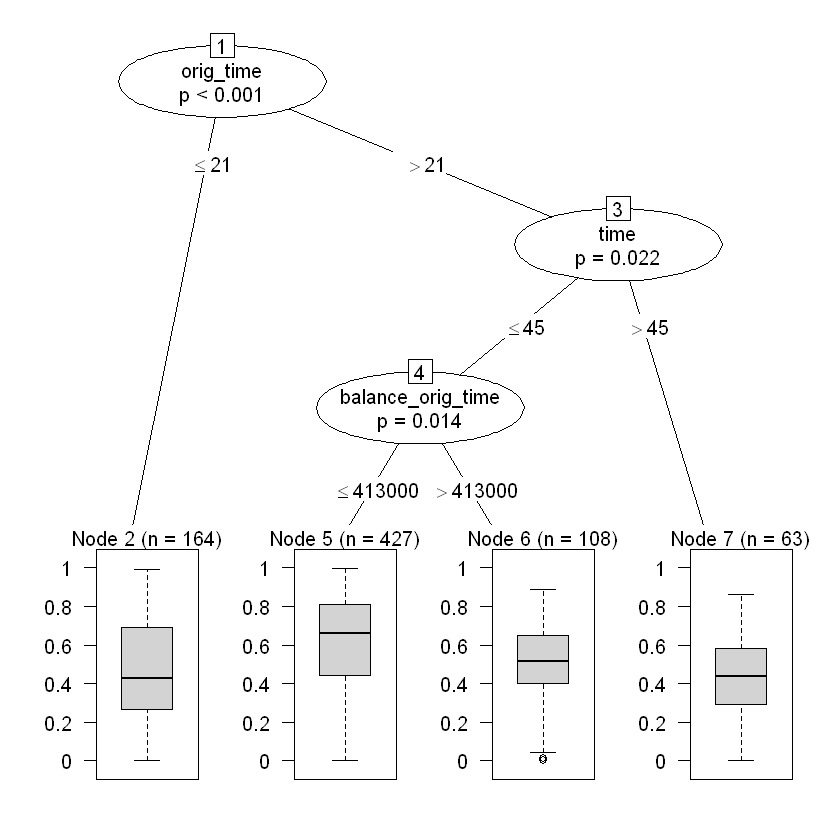

In [2035]:
plot(lgd_da_5)

In [2036]:
# fitting beta regression for observations in the lgd interval (0,1)

In [2042]:
fit_beta <- betareg(lgd_time ~ LTV_time+time+state_orig_time, data=train, subset = predict(lgd_da_4, type = 'node') == 3)

In [2043]:
# different types of residuals can be used 
summary(fit_beta, type = 'sweighted')


Call:
betareg(formula = lgd_time ~ LTV_time + time + state_orig_time, data = train, 
    subset = predict(lgd_da_4, type = "node") == 3)

Standardized weighted residuals:
    Min      1Q  Median      3Q     Max 
-5.5314 -0.4697  0.0786  0.5784  3.4244 

Coefficients (mean model with logit link):
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -0.152519   0.538489  -0.283  0.77700    
LTV_time           0.010184   0.002215   4.597 4.29e-06 ***
time              -0.015420   0.005875  -2.625  0.00868 ** 
state_orig_timeAK -2.176396   1.170689  -1.859  0.06302 .  
state_orig_timeAL  0.250856   0.644174   0.389  0.69696    
state_orig_timeAR -2.087682   1.174525  -1.777  0.07549 .  
state_orig_timeAZ  0.011571   0.539830   0.021  0.98290    
state_orig_timeCA -0.216788   0.518855  -0.418  0.67608    
state_orig_timeCO -0.663616   0.571016  -1.162  0.24517    
state_orig_timeCT -1.381530   0.735054  -1.879  0.06018 .  
state_orig_timeDC  1.252745   1.171735   1

In [1966]:
test_lgd_diff <- test[test['lgd_diff']==1,]

In [1967]:
test_lgd_diff <- tibble::rowid_to_column(test_lgd_diff, "id")

In [1968]:
beta_predicted <- predict(fit_beta, newdata = test_lgd_diff)

In [1970]:
test_lgd_diff$predicted_loss <- beta_predicted

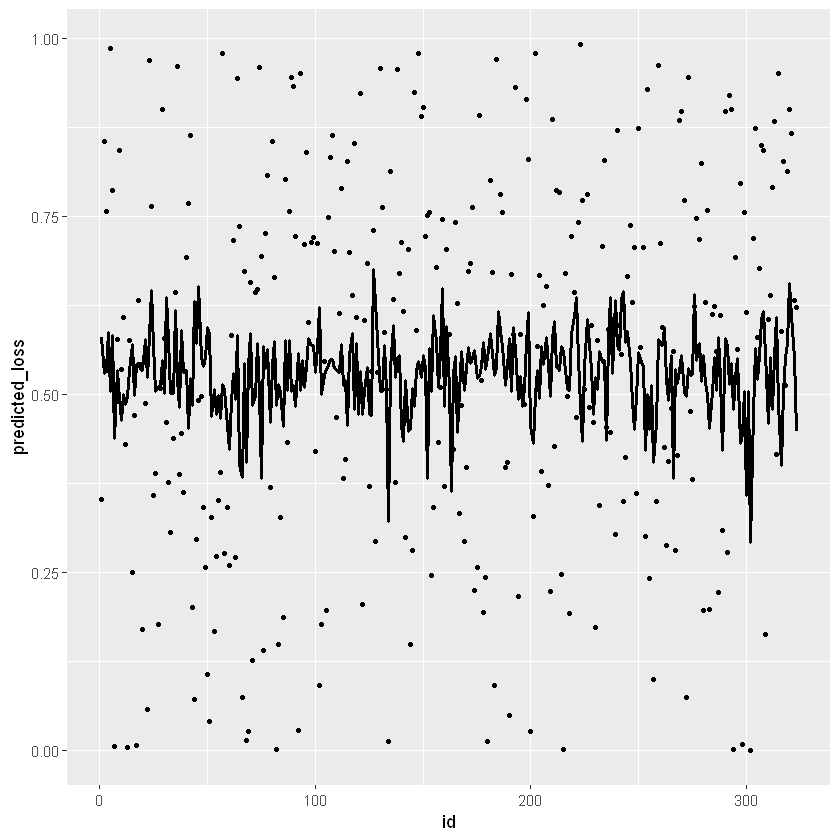

In [1972]:
ggplot()+
    geom_line(data=test_lgd_diff,aes(y=predicted_loss,x=id),size=1) +
    geom_point(data=test_lgd_diff,aes(y=lgd_time,x=id),size=1)

In [ ]:
# As it can be noticed comparing the results received using beta regression and mixture model(beta regression on the interval(0,1)), 
# the pseudo R-squared is better in the first model, which seems counterintuitve
# The explanation can be that both models are not able to capture the results and in this case the pseudo R-squared is not appropriate metric to confirm models superiority

### ML models

#### Regression tree

In [2084]:
# filtering loans that defaulted
data_modelling <- subset(data, (data[,"status_time"] == 1))

In [2085]:
# A loan that deafaulted and was not cured (resolution)
data_modelling$res_sold <- 1

In [2086]:
# A loan that deafaulted and was cured (no resolution)
data_modelling$res_sold[is.na(data_modelling[,"res_time"])] <- 0

In [2087]:
# selecting predictors and dependent variable(lgd_time)
data_modelling <- dplyr::select(data_modelling, 2:8,14:16,18:20,22,27:30)

In [2089]:
# deleting resolution timestamp and resolution amount
data_modelling <- data_modelling[,-c(5,14,16)]

In [2090]:
str(data_modelling)

'data.frame':	1525 obs. of  15 variables:
 $ time               : int  37 37 40 31 31 33 31 32 42 41 ...
 $ orig_time          : int  18 25 21 21 23 27 26 27 27 28 ...
 $ first_time         : int  25 33 25 25 26 28 28 32 32 32 ...
 $ mat_time           : int  138 141 141 142 143 147 147 148 148 228 ...
 $ balance_time       : num  130140 127859 84387 227000 223885 ...
 $ LTV_time           : num  99.1 101.4 102.6 67.5 87.2 ...
 $ REtype_CO_orig_time: int  0 0 0 0 0 1 0 0 0 0 ...
 $ REtype_PU_orig_time: int  0 0 0 0 0 0 0 0 0 0 ...
 $ REtype_SF_orig_time: int  1 1 1 1 1 0 1 1 1 1 ...
 $ balance_orig_time  : num  128000 129500 88000 227000 227200 ...
 $ FICO_orig_time     : int  501 536 556 622 630 613 605 596 633 587 ...
 $ LTV_orig_time      : num  80 69.6 80 64.9 80 80 80 71.1 90 80 ...
 $ lgd_time           : num  0.00784 0 0 0 0.88392 ...
 $ mat_diff           : int  120 116 120 121 120 120 121 121 121 200 ...
 $ res_sold           : num  0 0 0 0 1 1 1 0 1 0 ...


In [2091]:
# deleting row with NA observation
data_modelling <- data_modelling[!is.na(data_modelling['LTV_time']),]

In [2092]:
# changing variables types
data_modelling[colnames(data_modelling[,c(7:9)])] <- lapply(data_modelling[colnames(data_modelling[,c(7:9)])], factor)

In [2093]:
data_modelling$res_sold <- as.factor(data_modelling$res_sold)

In [2094]:
# data_modelling$state_orig_time <- as.factor(data_modelling$state_orig_time)

In [2096]:
train_index <- caret::createDataPartition(data_modelling$res_sold, p = .7, list = FALSE)

In [2097]:
train <- data_modelling[ train_index,]
test <- data_modelling[-train_index,]

In [2098]:
# Fitting regression tree
lgd_reg_tree <- tree(lgd_time~.-res_sold, data=train)

In [2099]:
summary(lgd_reg_tree)


Regression tree:
tree(formula = lgd_time ~ . - res_sold, data = train)
Variables actually used in tree construction:
[1] "time"              "LTV_time"          "FICO_orig_time"   
[4] "balance_time"      "balance_orig_time"
Number of terminal nodes:  7 
Residual mean deviance:  0.1208 = 128 / 1060 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.836600 -0.306900 -0.002433  0.000000  0.255300  1.716000 

In [2106]:
tree_predict_test <- predict(lgd_reg_tree, test)

In [2107]:
rmse_lgd_reg_test <- sqrt(mean((tree_predict_test-test$lgd_time)^2))

In [2108]:
print(rmse_lgd_reg_test)

[1] 0.3667387


In [2109]:
# tree pruning
lgd_reg_tree_prune <- prune.tree(lgd_reg_tree, best=4)

In [2110]:
summary(lgd_reg_tree_prune)


Regression tree:
snip.tree(tree = lgd_reg_tree, nodes = c(11L, 4L))
Variables actually used in tree construction:
[1] "time"              "LTV_time"          "balance_orig_time"
Number of terminal nodes:  4 
Residual mean deviance:  0.1287 = 136.8 / 1063 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.836600 -0.306900  0.003013  0.000000  0.247200  1.716000 

In [2111]:
tree_predict_prune_test <- predict(lgd_reg_tree_prune, test)

In [2112]:
rmse_prune_test <- sqrt(mean((tree_predict_prune_test-test$lgd_time)^2))

In [2113]:
print(rmse_prune_test)

[1] 0.3661421


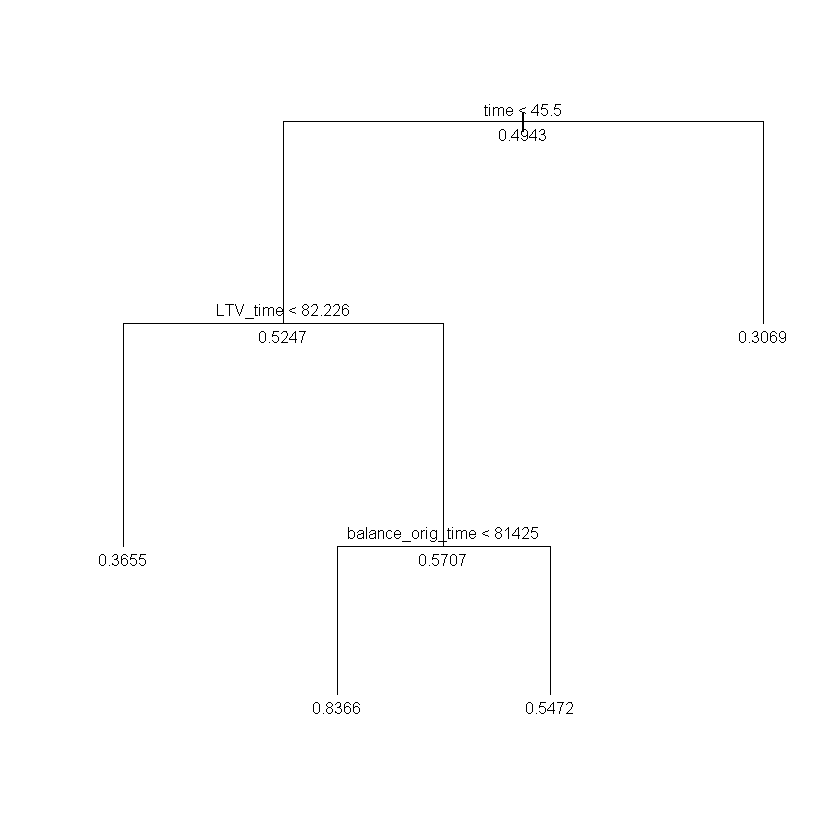

In [2114]:
# Pruned tree LGD modelling with four nodes and three key variables
plot(lgd_reg_tree_prune, 
    main="Classification Tree for Kyphosis")
    text(lgd_reg_tree_prune, all=TRUE, cex=.8)

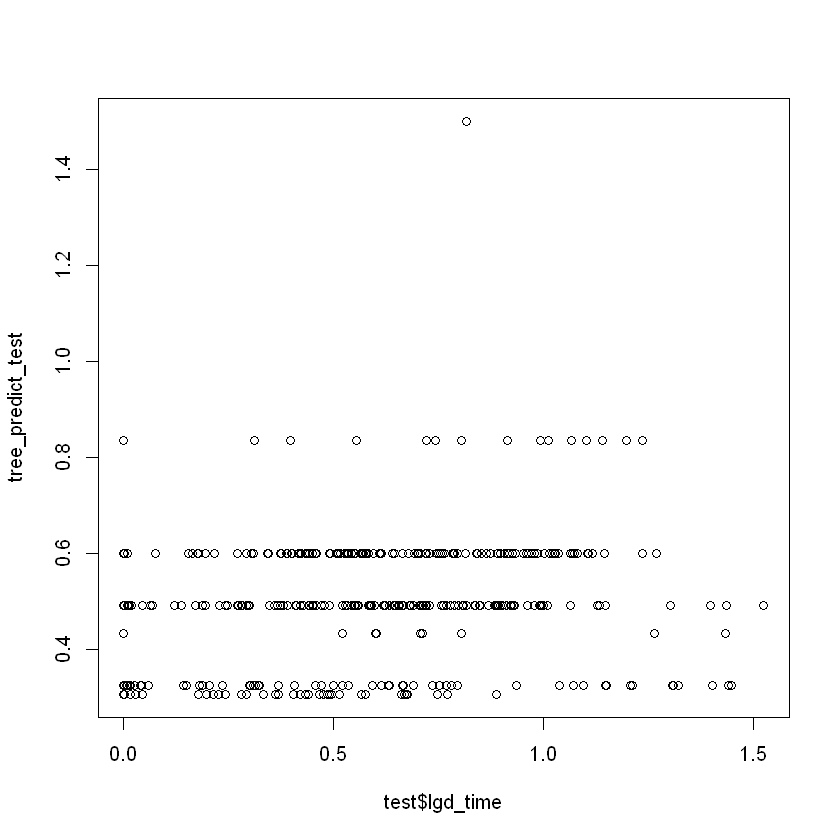

In [2115]:
# The tree structure is such that, for a given tree leaf, all accounts have the same LGD.
# This phenomenon is even more clear in the second graph, where the pruning process reduces the number of final nodes.
plot(test$lgd_time, tree_predict_test)

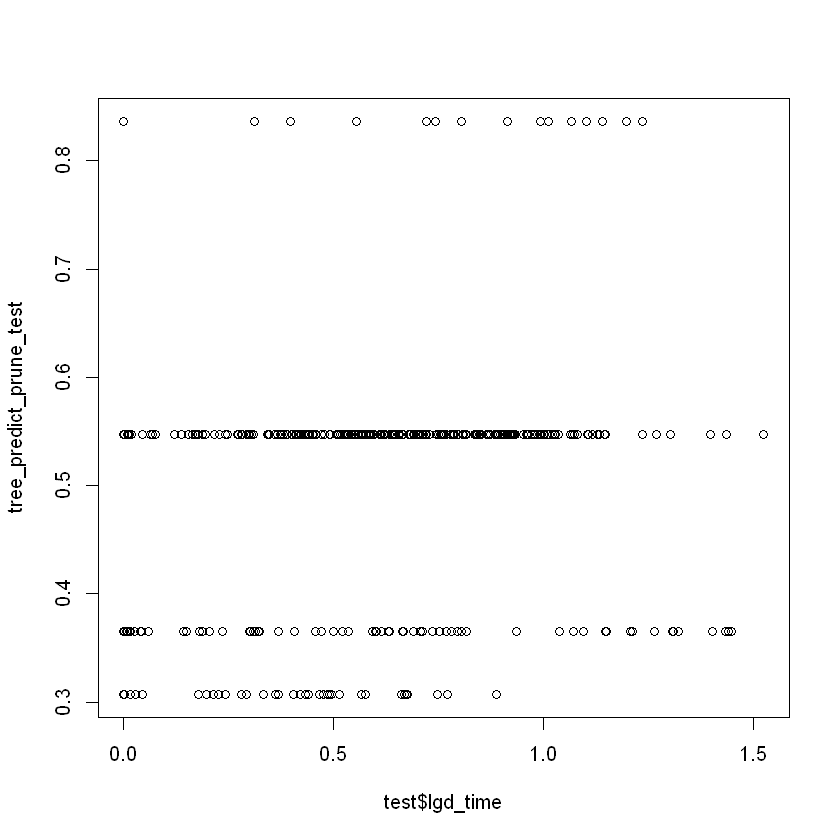

In [2116]:
plot(test$lgd_time, tree_predict_prune_test)

#### Random Forest

In [2117]:
rf_lgd <- randomForest(lgd_time~.-res_sold, data=train,mtry=4, ntree=100, importance=TRUE, na.action=na.omit)

In [2118]:
print(rf_lgd)


Call:
 randomForest(formula = lgd_time ~ . - res_sold, data = train,      mtry = 4, ntree = 100, importance = TRUE, na.action = na.omit) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 4

          Mean of squared residuals: 0.1338879
                    % Var explained: 7.26


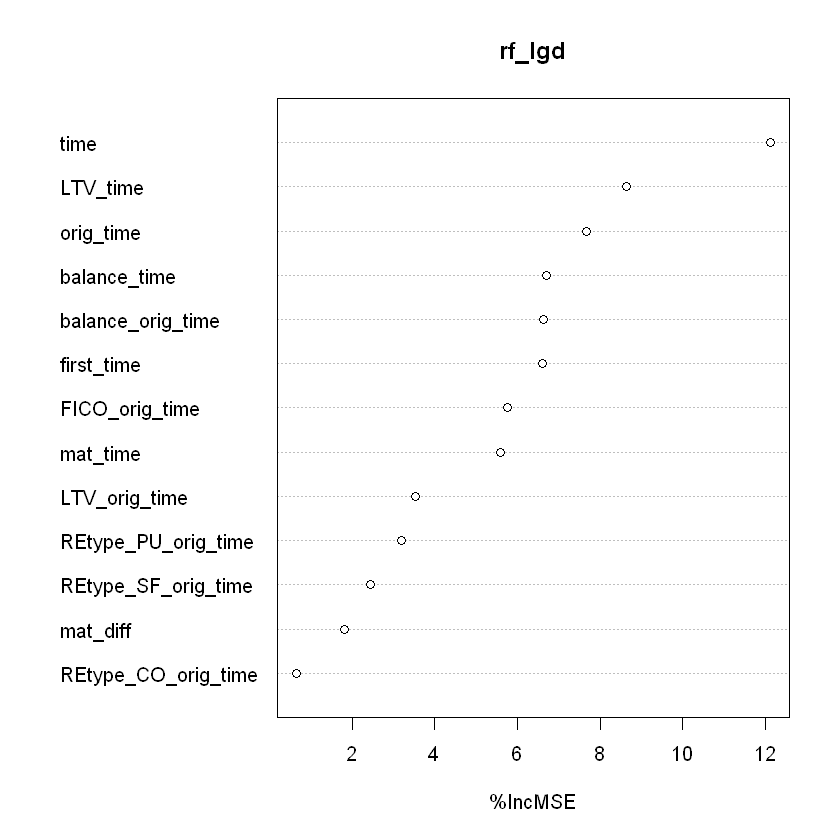

In [2119]:
# variable importance, type = 1 (IncMSE)
varImpPlot(rf_lgd,type=1)

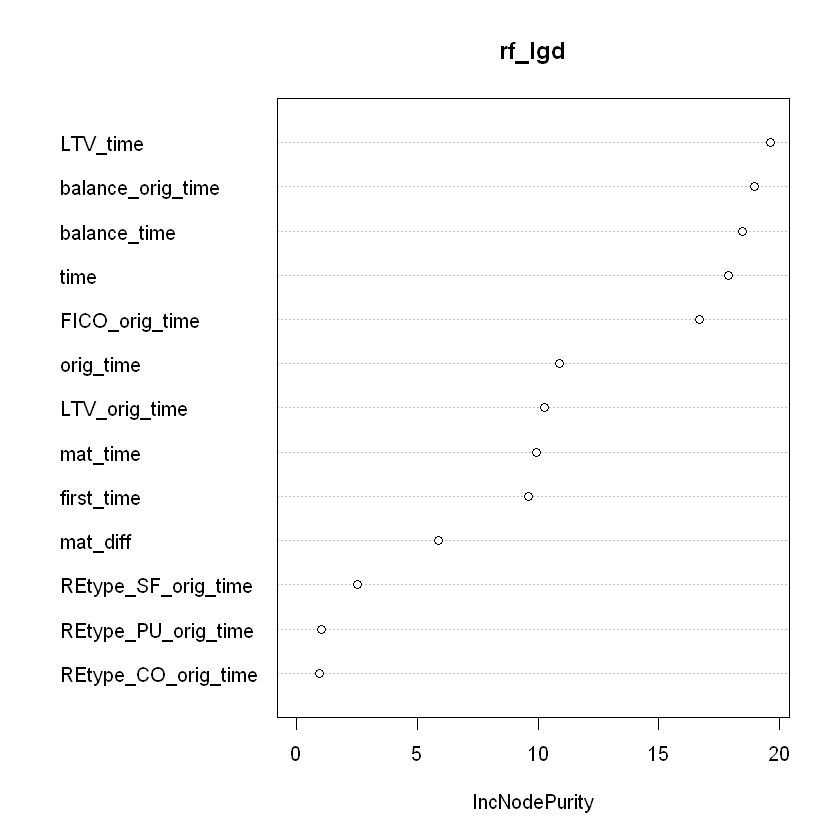

In [2120]:
# variable importance, type = 2 (IncNodePurity)
varImpPlot(rf_lgd,type=2)

In [2121]:
# predicting based on model
yhat_rf_lgd_test <- predict(rf_lgd,newdata=test)

In [ ]:
# As in case of Decision Trees, an optimal model would align fitted values on a 45-degree diagonal.

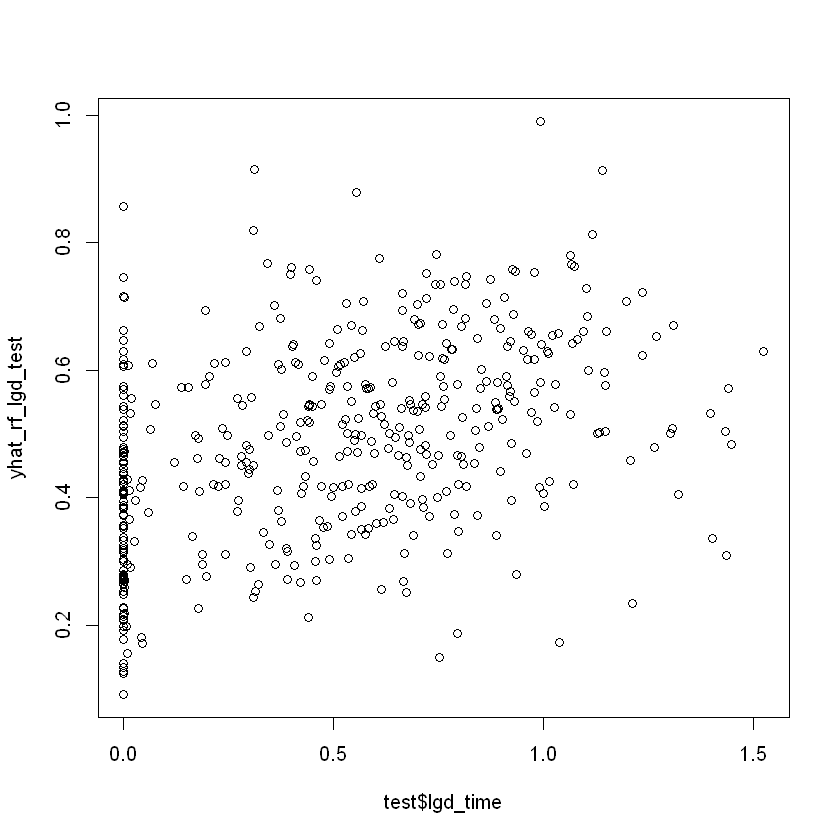

In [2122]:
plot(test$lgd_time, yhat_rf_lgd_test)

In [2123]:
rmse_lgd_reg_test <- sqrt(mean((yhat_rf_lgd_test-test$lgd_time)^2))

#### Random Forest with Macroeconomic Variables

In [2164]:
# filtering loans that defaulted
data_modelling <- subset(data, (data[,"status_time"] == 1))

In [2165]:
# A loan that deafaulted and was not cured (resolution)
data_modelling$res_sold <- 1

In [2166]:
# A loan that deafaulted and was cured (no resolution)
data_modelling$res_sold[is.na(data_modelling[,"res_time"])] <- 0

In [2168]:
# selecting predictors and dependent variable(res_sold)
data_modelling <- dplyr::select(data_modelling, 2:23,27:30)

In [2171]:
# deleting resolution timestamp and resolution amount
data_modelling <- data_modelling[,-c(5,9,16,24)]

In [2172]:
str(data_modelling)

'data.frame':	1525 obs. of  22 variables:
 $ time                   : int  37 37 40 31 31 33 31 32 42 41 ...
 $ orig_time              : int  18 25 21 21 23 27 26 27 27 28 ...
 $ first_time             : int  25 33 25 25 26 28 28 32 32 32 ...
 $ mat_time               : int  138 141 141 142 143 147 147 148 148 228 ...
 $ balance_time           : num  130140 127859 84387 227000 223885 ...
 $ LTV_time               : num  99.1 101.4 102.6 67.5 87.2 ...
 $ interest_rate_time     : num  8 7 7.81 7.33 7.36 ...
 $ hpi_time               : num  153 153 156 201 201 ...
 $ gdp_time               : num  -4.15 -4.15 1.59 1.85 1.85 ...
 $ uer_time               : num  9 9 9.8 4.7 4.7 5 4.7 5 9.4 9.9 ...
 $ REtype_CO_orig_time    : int  0 0 0 0 0 1 0 0 0 0 ...
 $ REtype_PU_orig_time    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ REtype_SF_orig_time    : int  1 1 1 1 1 0 1 1 1 1 ...
 $ balance_orig_time      : num  128000 129500 88000 227000 227200 ...
 $ FICO_orig_time         : int  501 536 556 622 630 613 

In [2173]:
# changing variables types
data_modelling[colnames(data_modelling[,c(11:13)])] <- lapply(data_modelling[colnames(data_modelling[,c(11:13)])], factor)

In [2174]:
data_modelling$state_orig_time <- as.factor(data_modelling$state_orig_time)

In [2175]:
data_modelling$res_sold <- as.factor(data_modelling$res_sold)

In [2176]:
# deleting row with NA observation
data_modelling <- data_modelling[!is.na(data_modelling['LTV_time']),]

In [470]:
# 1.2. Filter historical data set
lgd_fwd_macro_sel <- lgd_fwd_macro_sel_all[1:430,]

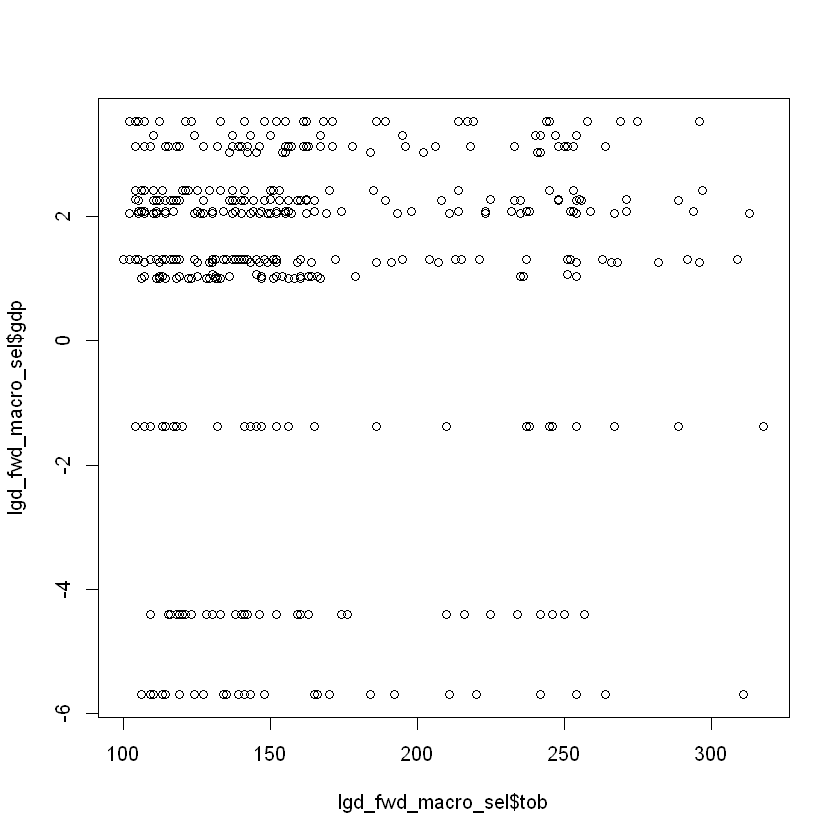

In [2194]:
plot(lgd_fwd_macro_sel$tob,lgd_fwd_macro_sel$gdp)

In [2177]:
set.seed(101)

In [2178]:
train_index_macro <- caret::createDataPartition(data_modelling$res_sold, p = .7, list = FALSE)

In [2180]:
train_macro <- data_modelling[ train_index_macro,]
test_macro <- data_modelling[-train_index_macro,]

In [2182]:
rf_lgd_macro <- randomForest(lgd_time~.-res_sold, data=train_macro, mtry=4, ntree=100, importance=TRUE, na.action=na.omit)

In [2186]:
importance(rf_lgd_macro, type = 1)

,%IncMSE
time,7.5307133
orig_time,3.7376516
first_time,3.8644040
mat_time,3.8913211
balance_time,4.7774241
LTV_time,5.9487279
interest_rate_time,4.8437196
hpi_time,4.2214767
gdp_time,3.2141573
uer_time,4.6072675


In [2184]:
# predicting based on model
yhat_rf_macro_lgd_test <- predict(rf_lgd_macro,newdata=test_macro)

In [ ]:
# As in case of Decision Trees, an optimal model would align fitted values on a 45-degree diagonal.

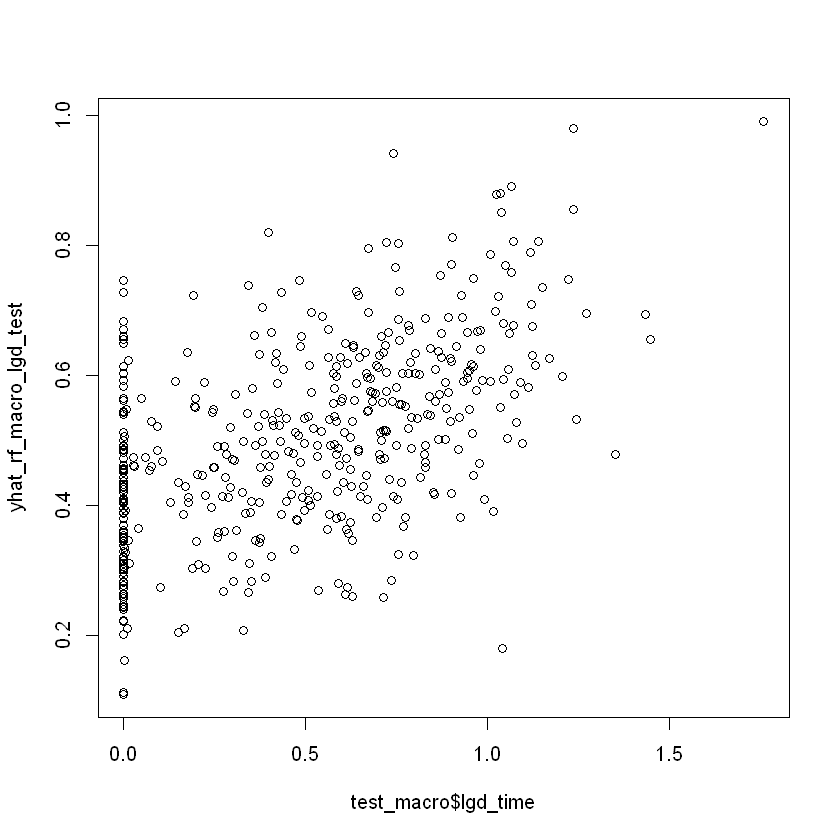

In [2185]:
plot(test_macro$lgd_time, yhat_rf_macro_lgd_test)

In [2187]:
rmse_lgd_reg_test <- sqrt(mean((yhat_rf_macro_lgd_test-test_macro$lgd_time)^2))

In [2188]:
rmse_lgd_reg_test

[1] 0.3203518

In [2191]:
# sensitivity analysis based on EDA

In [2205]:
data_modelling$time_div <- dplyr::if_else(data_modelling$time < 15 | data_modelling$time > 40,1,0)

In [2209]:
# frequency of values
table(data_modelling$time_div)


   0    1 
1122  402 

In [2208]:
# base scenario - observations for which MV's are stable
# based on the EDA for periods - 1:15, 40:60
lgd_data_macro_base <- data_modelling[data_modelling['time_div']==1,]

In [2210]:
lgd_data_macro_stress <- data_modelling[data_modelling['time_div']==0,]

In [2221]:
# random sampling 402 observations, so both datasets have the same size
lgd_data_macro_stress <- lgd_data_macro_stress[sample(nrow(lgd_data_macro_stress), replace = TRUE,prob = lgd_data_macro_stress$time, 402), ]

In [2222]:
yhat_rf_lgd_macro_base <- predict(rf_lgd_macro, newdata=lgd_data_macro_base)

In [2223]:
yhat_rf_lgd_macro_stress <- predict(rf_lgd_macro, newdata=lgd_data_macro_stress)

integer(0)

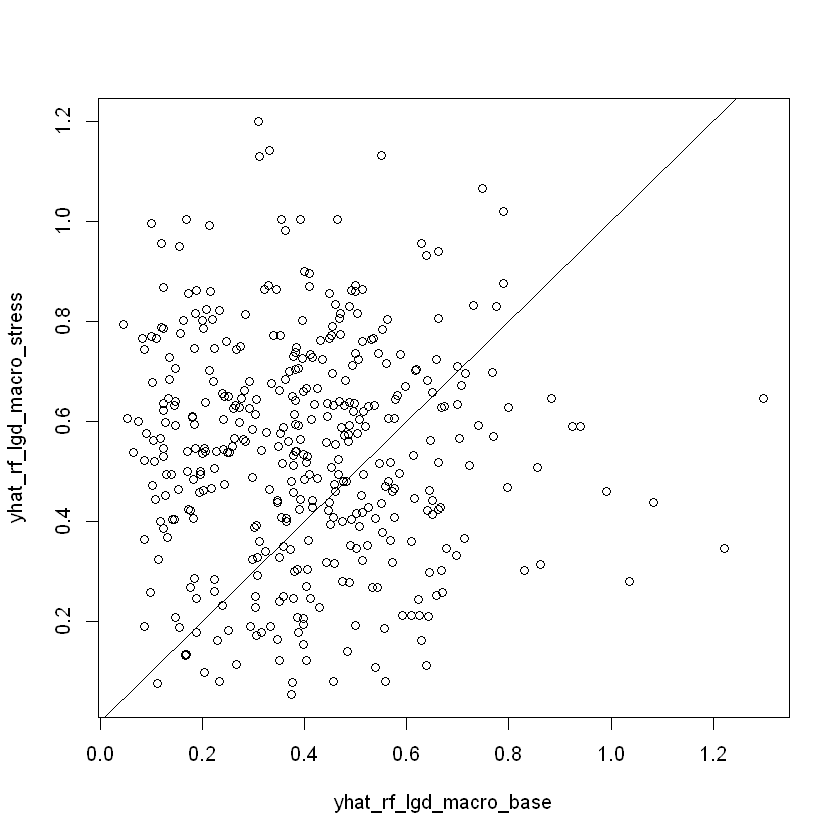

In [2224]:
plot(yhat_rf_lgd_macro_base, yhat_rf_lgd_macro_stress)+
    abline(coef = c(0,1))

In [2227]:
scenario_diff <- yhat_rf_lgd_macro_stress - yhat_rf_lgd_macro_base

In [2229]:
scenario_diff <- as.data.frame(scenario_diff)

In [2234]:
scenario_diff$count_diff <- dplyr::if_else(scenario_diff$scenario_diff <0,0,1)

In [2236]:
table(scenario_diff$count_diff)


  0   1 
132 270 

In [ ]:
# The majority of accounts is on the upper side of the diagonal, which is confirmed by the calculations(130 vs 270)
# This points out the role of macroeconomic variables in projecting LGDs.

### Generalized Boosted Regression

In [2125]:
set.seed(101)

In [2126]:
boost_lgd <- gbm(lgd_time~.-res_sold,
                data=train,
                distribution='gaussian',n.trees=100,interaction.depth=4)

,var,rel.inf
,<chr>,<dbl>
LTV_time,LTV_time,17.7767472
time,time,14.2517766
balance_time,balance_time,13.9667301
balance_orig_time,balance_orig_time,13.8800842
FICO_orig_time,FICO_orig_time,11.3749657
LTV_orig_time,LTV_orig_time,7.8681022
orig_time,orig_time,7.6030308
mat_time,mat_time,6.3595221
first_time,first_time,3.9828695


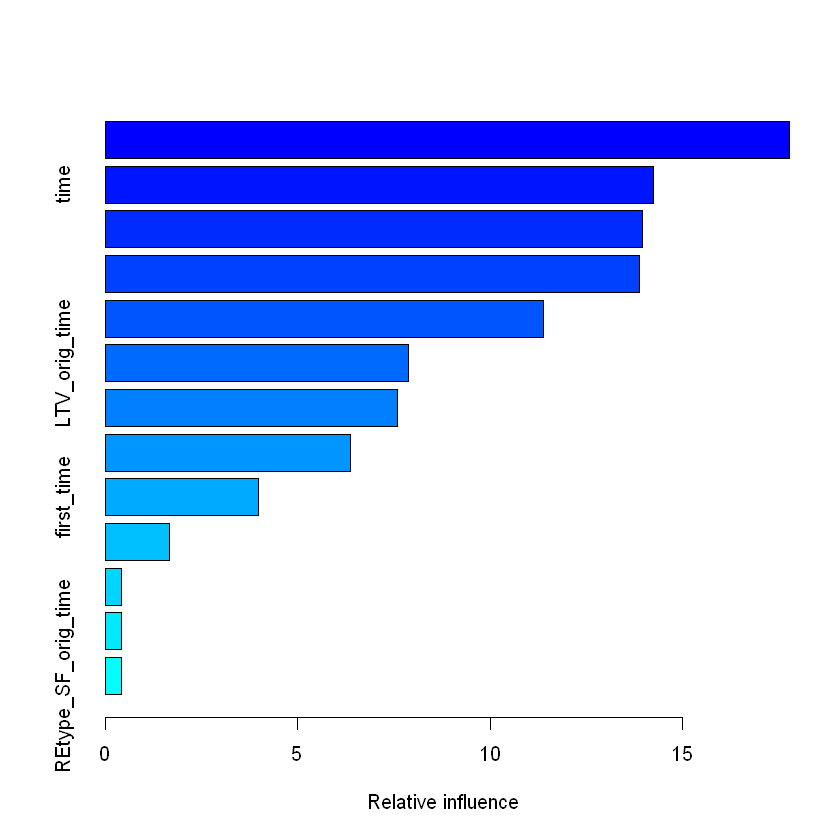

In [2127]:
summary(boost_lgd)

In [2130]:
# Prediction
yhat_boost_lgd_test=predict(boost_lgd,
                            newdata=test,n.trees=100)

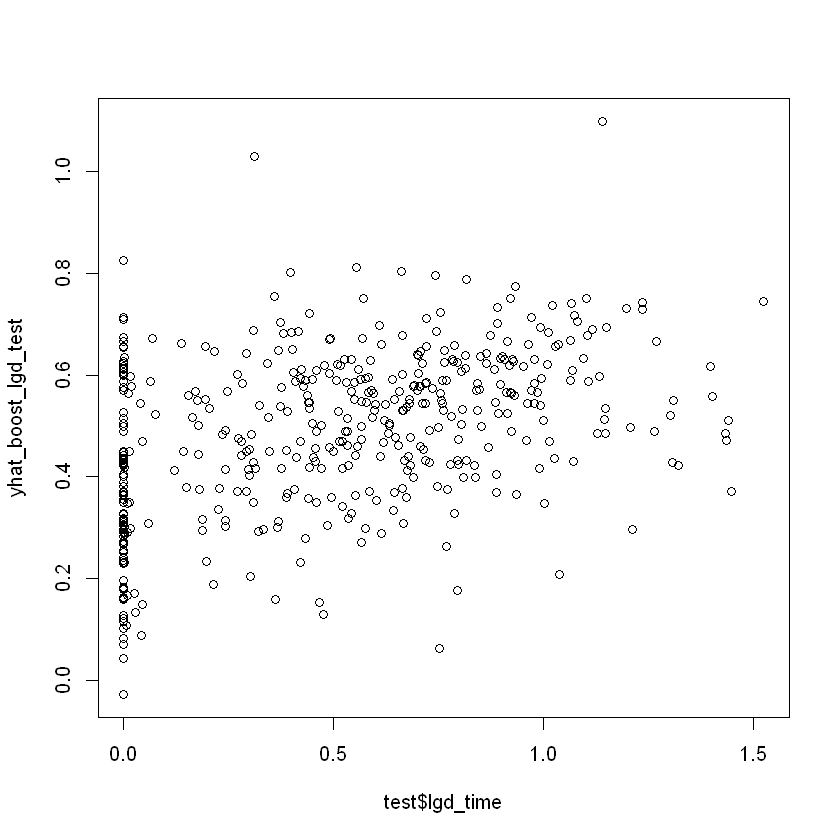

In [2131]:
plot(test$lgd_time, yhat_boost_lgd_test)

In [2132]:
rmse_lgd_reg_test <- sqrt(mean((yhat_boost_lgd_test-test$lgd_time)^2))

In [2133]:
rmse_lgd_reg_test

[1] 0.3478627

In [2134]:
# Applying a shrinkage
boost_lgd_shr=gbm(lgd_time~.-res_sold,
                data=train,
                distribution='gaussian',n.trees=100,interaction.depth=4,
                shrinkage=0.2,verbose=F)

In [2135]:
yhat_boost_lgd_test_shr=predict(boost_lgd_shr, newdata=test,n.trees=100)

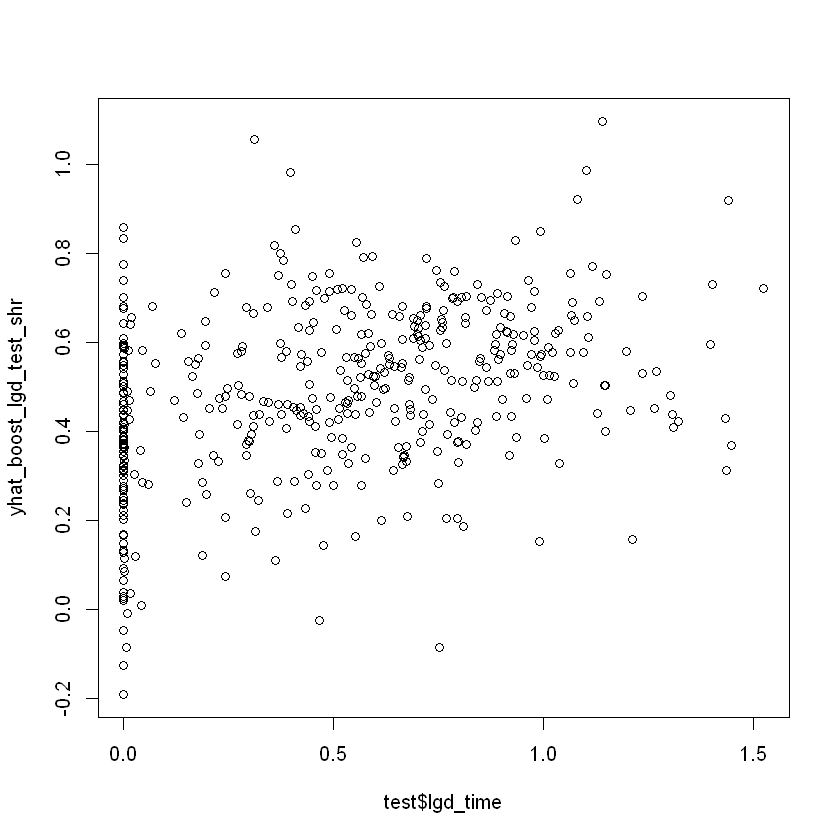

In [2136]:
# graph after shrinkage
plot(test$lgd_time, yhat_boost_lgd_test_shr)

In [2137]:
rmse_lgd_reg_test <- sqrt(mean((yhat_boost_lgd_test_shr-test$lgd_time)^2))

In [2138]:
rmse_lgd_reg_test

[1] 0.3627369